In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

In [ ]:
cols_na = [col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
dataHP[cols_na].dtypes

## 1. Imputacion Variables Numericas

In [95]:
#Porcentage variables faltantes

prop_cols_na = dataHP[cols_na].isnull().mean()
prop_cols_na


LotFrontage            0.177397
Alley                  0.937671
MasVnrType             0.005479
BsmtQual               0.025342
BsmtCond               0.025342
BsmtExposure           0.026027
BsmtFinType1           0.025342
BsmtFinType2           0.026027
Electrical             0.000685
FireplaceQu            0.472603
GarageType             0.055479
GarageYrBlt            0.055479
GarageFinish           0.055479
GarageQual             0.055479
GarageCond             0.055479
PoolQC                 0.995205
Fence                  0.807534
MiscFeature            0.963014
LotFrontage_Capping    0.177397
dtype: float64

In [6]:
cols_rescatables_total = [col for col in dataHP.columns if(dataHP[col].isnull().mean()<= 0.06)]
cols_rescatables_numericas = [col for col in dataHP.columns if dataHP[col].isnull().mean() <= 0.06 and dataHP[col].dtype == np.float64]

### Variables Rescatables

In [96]:
# Media y mediana de variables rescatables numericas

resultados = {}

for col in cols_rescatables_numericas:
    resultados[col] = {
        'media': dataHP[col].mean(),
        'mediana': dataHP[col].median()
    }

for col, values in resultados.items():
    print(f"Media {col}: {values['media']}")
    print(f"Mediana {col}: {values['mediana']}")


Media MasVnrArea: 103.68698630136986
Mediana MasVnrArea: 0.0
Media GarageYrBlt: 1978.5061638868744
Mediana GarageYrBlt: 1980.0


In [8]:
media_MasVnrArea = dataHP['MasVnrArea'].mean()
mediana_MasVnrArea = dataHP['MasVnrArea'].median()
media_GarageYrBlt = dataHP['GarageYrBlt'].mean()
mediana_GarageYrBlt = dataHP['GarageYrBlt'].median()

In [9]:
# Llenar filas variables rescatables numericas con media y mediana

dataHP['MasVnrArea_Mean'] = np.round(dataHP['MasVnrArea'].fillna(media_MasVnrArea))
dataHP['MasVnrArea_Median'] = np.round(dataHP['MasVnrArea'].fillna(mediana_MasVnrArea))
dataHP['GarageYrBlt_Mean'] = np.round(dataHP['GarageYrBlt'].fillna(media_GarageYrBlt))
dataHP['GarageYrBlt_Median'] = np.round(dataHP['GarageYrBlt'].fillna(mediana_GarageYrBlt))

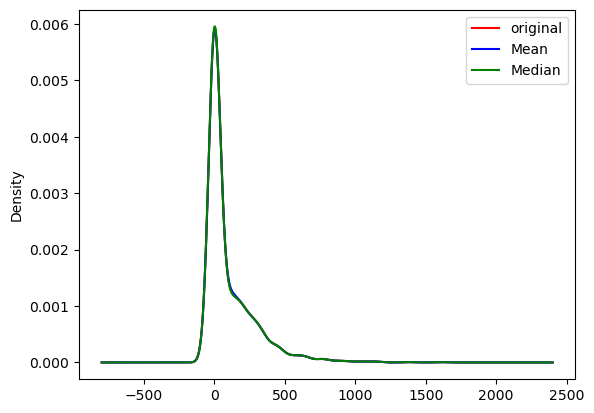

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP['MasVnrArea'].plot.density(color='red',label='original')
dataHP['MasVnrArea_Mean'].plot.density(color='blue',label='Mean')
dataHP['MasVnrArea_Median'].plot.density(color='green',label='Median')
ax.legend()
plt.show()

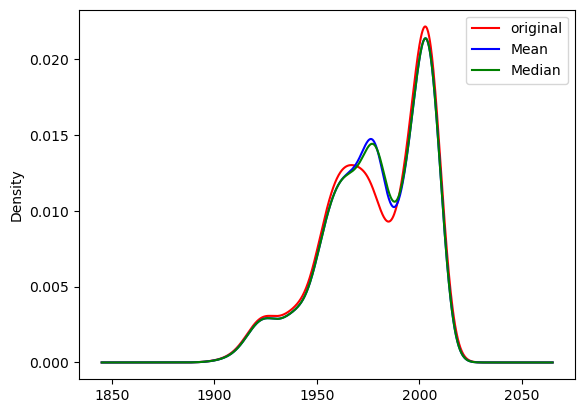

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP['GarageYrBlt'].plot.density(color='red',label='original')
dataHP['GarageYrBlt_Mean'].plot.density(color='blue',label='Mean')
dataHP['GarageYrBlt_Median'].plot.density(color='green',label='Median')
ax.legend()
plt.show()

### Variables No Rescatables

C:\Users\52334879\AppData\Local\Temp\ipykernel_36580\1994797006.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


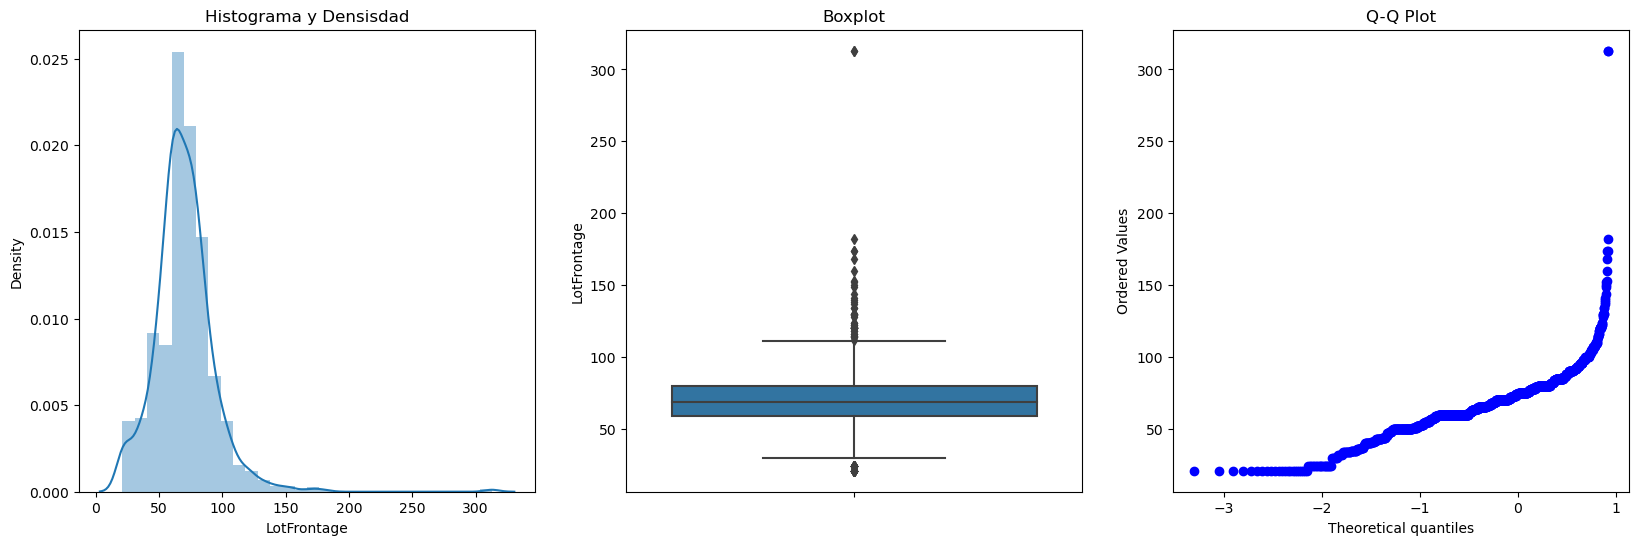

In [12]:
# Analisis variable numerica No Rescatable
def plotDistBoxQQ(dataset, col):

     plt.figure(figsize=(20, 6))
     plt.subplot(1, 3, 1)
     sns.distplot(dataset[col], bins=30)
     plt.title("Histograma y Densisdad")

     plt.subplot(1, 3, 2)
     sns.boxplot(y=dataset[col])
     plt.title("Boxplot")

     plt.subplot(1, 3, 3)

     stats.probplot(dataset[col], dist="norm", plot=plt)

     plt.title("Q-Q Plot")
     
plotDistBoxQQ(dataHP,'LotFrontage')

End of Tail Distribution

In [13]:
# End of Tail Distribution Imputation (Variable Numerica No Rescatable)

def detectOutliersLimits(dataset, col):
     '''
     Descripción: Calcula los limites superiores e inferiores para detección de outliers.
     Input: dataset-> pandas dataframe, col -> string nombre de columna
     Output: tupla de floats con los limites superior e inferior
     '''

     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     LS = dataset[col].quantile(0.75) + (IQR*1.75)

     return LI, LS

C:\Users\52334879\AppData\Local\Temp\ipykernel_36580\1994797006.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


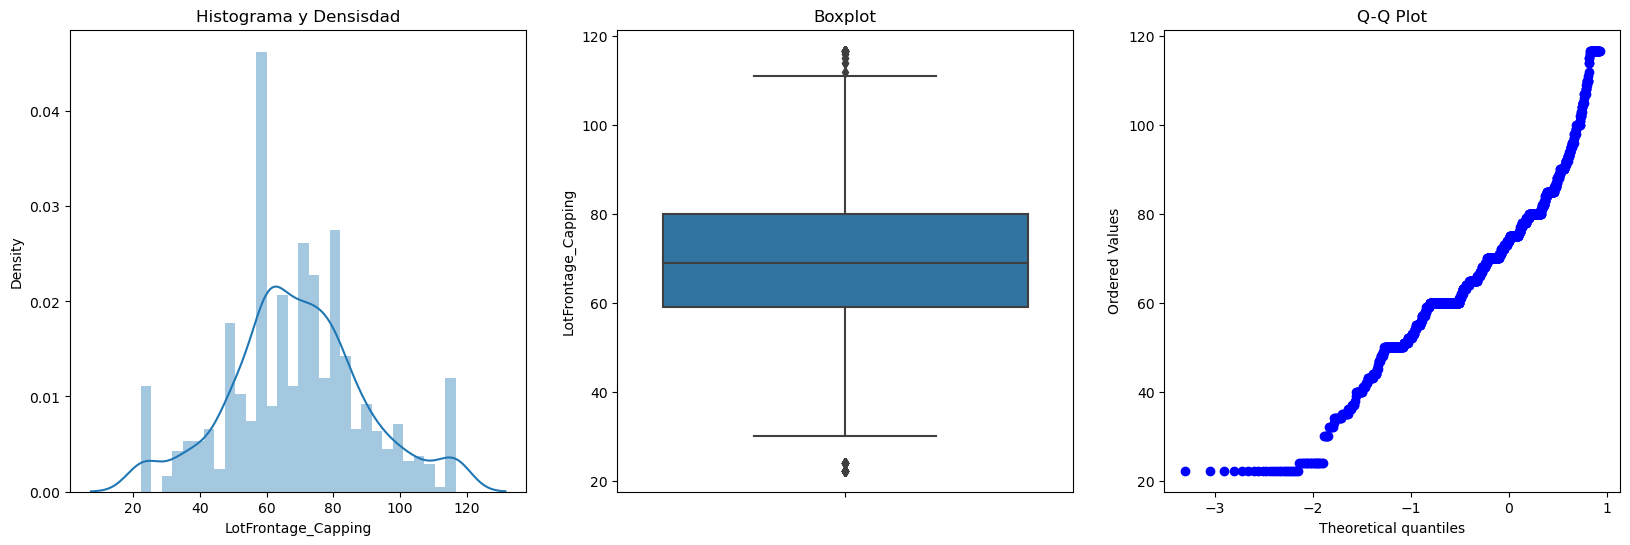

In [14]:
LI, LS = detectOutliersLimits(dataHP, 'LotFrontage')
dataHP['LotFrontage_Capping'] = np.where(dataHP['LotFrontage'] > LS, LS,
                                     np.where(dataHP['LotFrontage']<LI , LI, dataHP['LotFrontage']))
plotDistBoxQQ(dataHP,'LotFrontage_Capping')

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

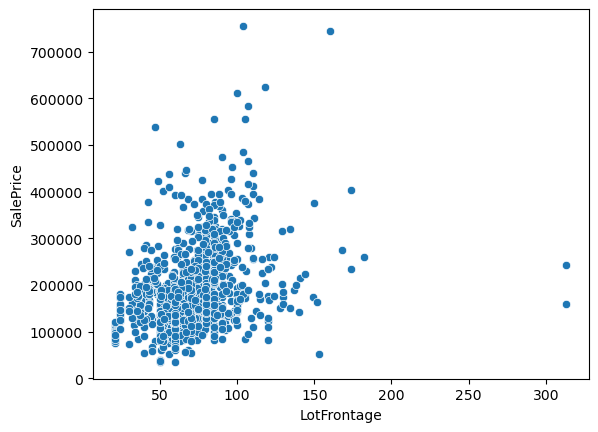

In [15]:
sns.scatterplot(x=dataHP['LotFrontage'],y=dataHP['SalePrice'])

<Axes: xlabel='LotFrontage_Capping', ylabel='SalePrice'>

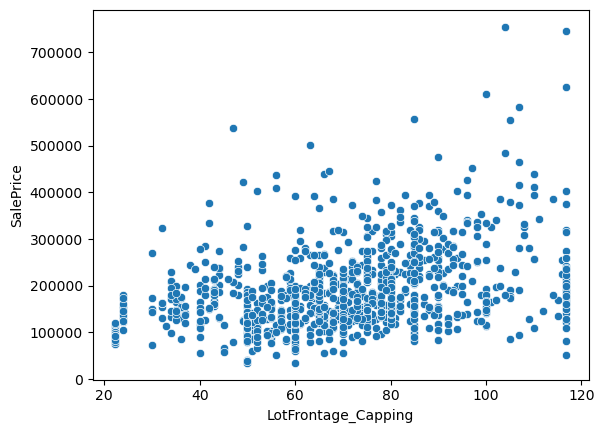

In [16]:
sns.scatterplot(x=dataHP['LotFrontage_Capping'],y=dataHP['SalePrice'])

## 2. Imputacion Variables Categoricas

In [17]:
#Categorias con variables faltantes
object_cols = dataHP.select_dtypes(include='object').columns.tolist()
dataset_cat_missing = dataHP[object_cols].loc[:, dataHP[object_cols].isnull().any()]
dataset_cat_missing['SalePrice'] = dataHP['SalePrice']
dataset_cat_missing

Alley MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0      NaN    BrkFace       Gd       TA           No          GLQ   
1      NaN       None       Gd       TA           Gd          ALQ   
2      NaN    BrkFace       Gd       TA           Mn          GLQ   
3      NaN       None       TA       Gd           No          ALQ   
4      NaN    BrkFace       Gd       TA           Av          GLQ   
...    ...        ...      ...      ...          ...          ...   
1455   NaN       None       Gd       TA           No          Unf   
1456   NaN      Stone       Gd       TA           No          ALQ   
1457   NaN       None       TA       Gd           No          GLQ   
1458   NaN       None       TA       TA           Mn          GLQ   
1459   NaN       None       TA       TA           No          BLQ   

     BsmtFinType2 Electrical FireplaceQu GarageType GarageFinish GarageQual  \
0             Unf      SBrkr         NaN     Attchd          RFn         TA   
1             Unf      SBrkr          TA     Attchd          RFn         TA   
2             Unf      SBrkr          TA     Attchd          RFn         TA   
3             Unf      SBrkr          Gd     Detchd          Unf         TA   
4             Unf      SBrkr          TA     Attchd          RFn         TA   
...           ...        ...         ...        ...          ...        ...   
1455          Unf      SBrkr          TA     Attchd          RFn         TA   
1456          Rec      SBrkr          TA     Attchd          Unf         TA   
1457          Unf      SBrkr          Gd     Attchd          RFn         TA   
1458          Rec      FuseA         NaN     Attchd          Unf         TA   
1459          LwQ      SBrkr         NaN     Attchd          Fin         TA   

     GarageCond PoolQC  Fence MiscFeature  SalePrice  
0            TA    NaN    NaN         NaN     208500  
1            TA    NaN    NaN         NaN     181500  
2            TA    NaN    NaN         NaN     223500  
3            TA    NaN    NaN         NaN     140000  
4            TA    NaN    NaN         NaN     250000  
...         ...    ...    ...         ...        ...  
1455         TA    NaN    NaN         NaN     175000  
1456         TA    NaN  MnPrv         NaN     210000  
1457         TA    NaN  GdPrv        Shed     266500  
1458         TA    NaN    NaN         NaN     142125  
1459         TA    NaN    NaN         NaN     147500  

[1460 rows x 17 columns]

In [18]:
dataset_cat_missing.isnull().mean()

Alley           0.937671
MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
SalePrice       0.000000
dtype: float64

In [19]:
# Desglose de proporciones de valores por categoria
columns_to_check = dataset_cat_missing

for column in columns_to_check:
    value_counts = dataset_cat_missing[column].value_counts()
    value_percentages = value_counts / len(dataset_cat_missing)
    print(f"Value percentages for {column}:")
    print(value_percentages)
    print()


Value percentages for Alley:
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64

Value percentages for MasVnrType:
None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

Value percentages for BsmtQual:
TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

Value percentages for BsmtCond:
TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

Value percentages for BsmtExposure:
No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64

Value percentages for BsmtFinType1:
Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64

Value percentages for BsmtFinType2:
Unf    0.860274
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

Value percentages for Electrical:
SBrkr    0

### Imputacion Alley

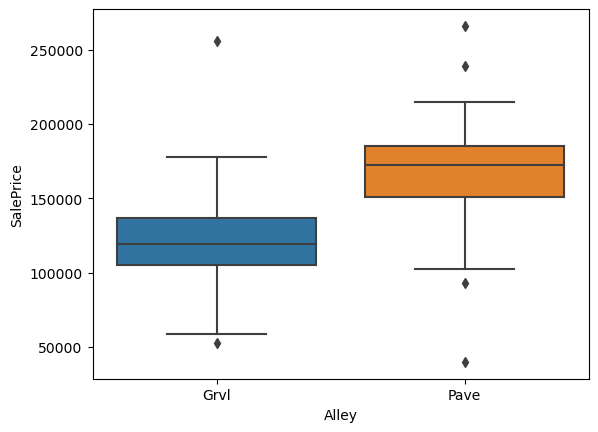

In [20]:
sns.boxplot(x=dataset_cat_missing['Alley'],y=dataset_cat_missing['SalePrice'])
plt.show()

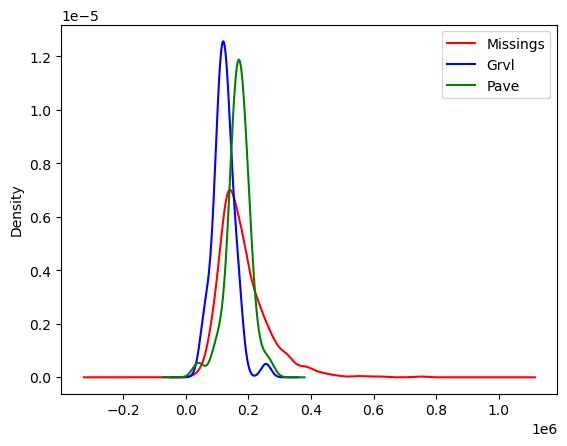

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['Alley'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['Alley'] == 'Grvl']['SalePrice'].plot(kind="kde", color="blue", label="Grvl")
dataset_cat_missing[dataset_cat_missing['Alley'] == 'Pave']['SalePrice'].plot(kind="kde", color="green", label="Pave")

ax.legend()
plt.show()

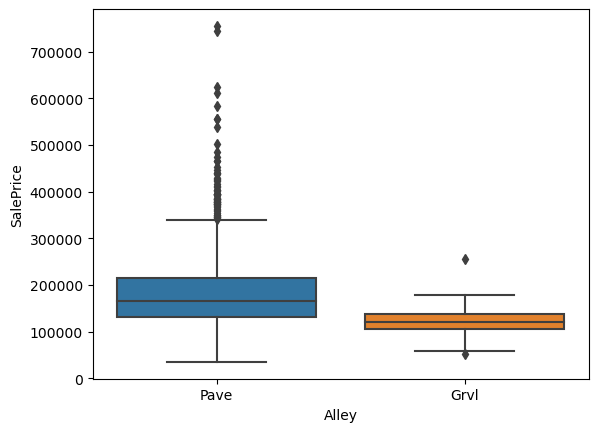

In [113]:
sns.boxplot(x=dataset_cat_missing['Alley'],y=dataset_cat_missing['SalePrice'])
plt.show()

In [116]:
dataset_cat_missing['Alley'].fillna('Pave', inplace=True)
dataHP['Alley'] = dataset_cat_missing['Alley']

Pave    1410
Grvl      50
Name: Alley, dtype: int64

### Imputacion MasVnrType

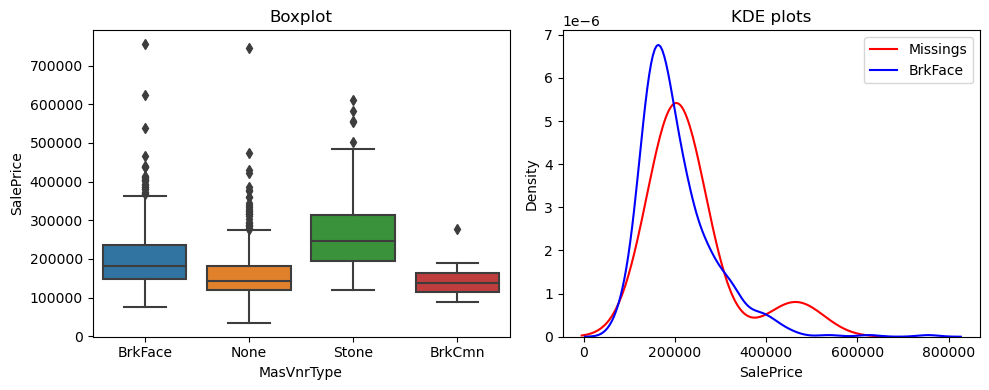

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['MasVnrType'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MasVnrType'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkFace'], x='SalePrice', color="blue", label="BrkFace", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [120]:
dataset_cat_missing['MasVnrType'].fillna('BrkFace', inplace=True)
dataHP['MasVnrType'] = dataset_cat_missing['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

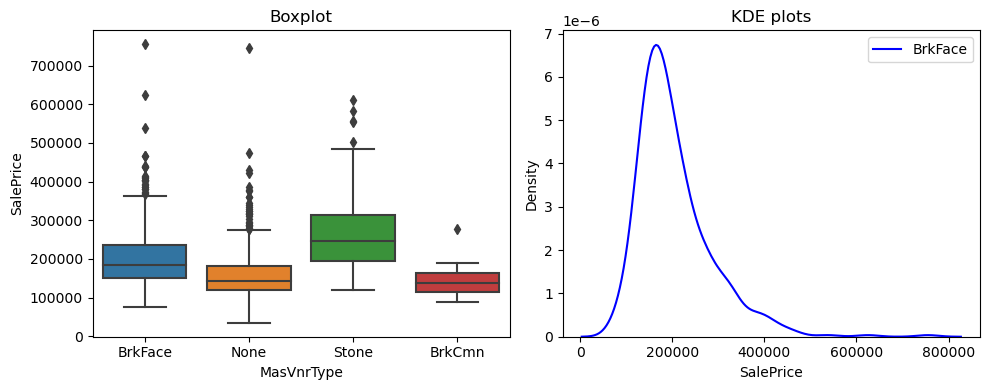

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['MasVnrType'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MasVnrType'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkFace'], x='SalePrice', color="blue", label="BrkFace", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### Imputacion BsmtQual

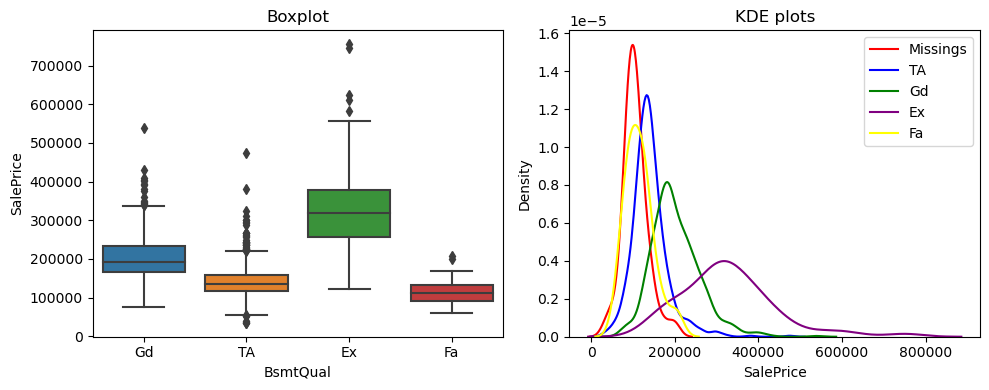

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['BsmtQual'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA'], x='SalePrice', color="blue", label="TA", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd'], x='SalePrice', color="green", label="Gd", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Ex'], x='SalePrice', color="purple", label="Ex", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Fa'], x='SalePrice', color="yellow", label="Fa", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [122]:
dataset_cat_missing['BsmtQual'].fillna('Fa',inplace=True)
dataHP['BsmtQual'] = dataset_cat_missing['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

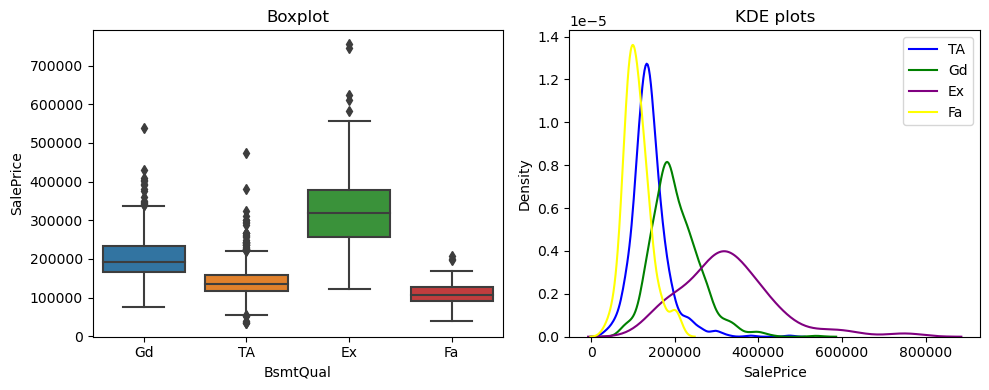

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['BsmtQual'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA'], x='SalePrice', color="blue", label="TA", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd'], x='SalePrice', color="green", label="Gd", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Ex'], x='SalePrice', color="purple", label="Ex", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Fa'], x='SalePrice', color="yellow", label="Fa", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### BsmtCond 

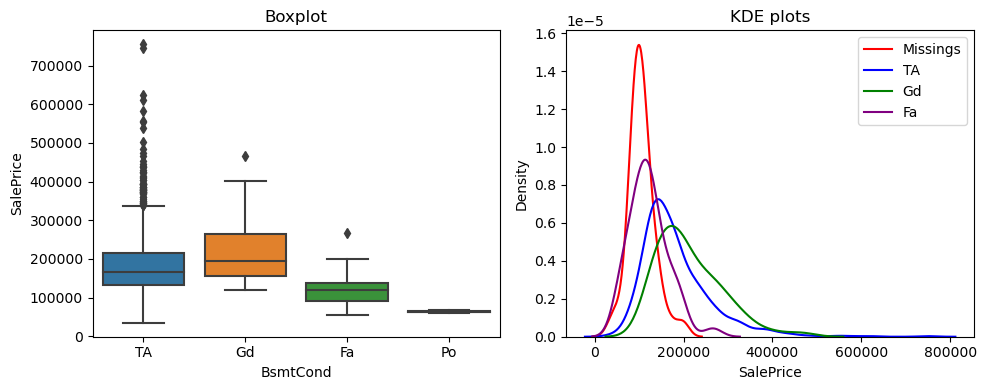

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['BsmtCond'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtCond'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'TA'], x='SalePrice', color="blue", label="TA", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Gd'], x='SalePrice', color="green", label="Gd", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Fa'], x='SalePrice', color="purple", label="Fa", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [123]:
dataset_cat_missing['BsmtCond'].fillna('Fa',inplace=True)
dataHP['BsmtCond'] = dataset_cat_missing['BsmtCond']

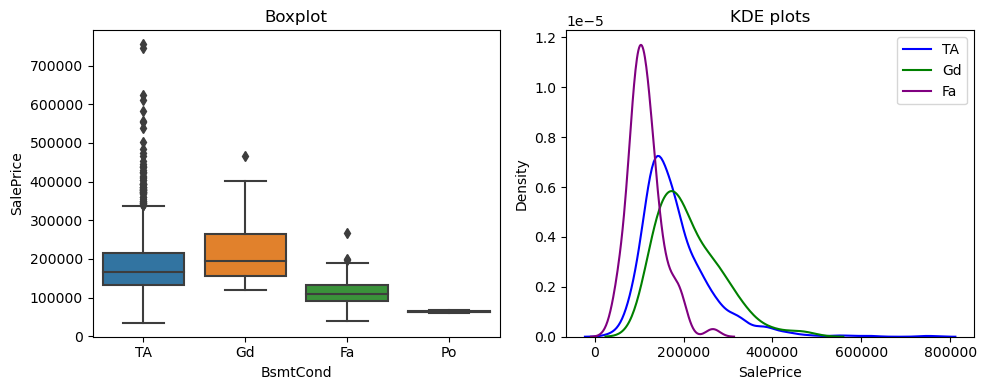

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['BsmtCond'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtCond'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'TA'], x='SalePrice', color="blue", label="TA", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Gd'], x='SalePrice', color="green", label="Gd", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Fa'], x='SalePrice', color="purple", label="Fa", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### BsmtExposure

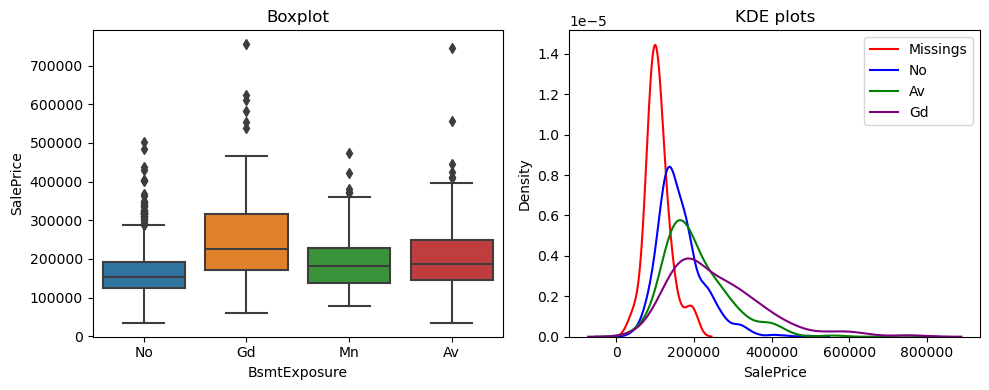

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['BsmtExposure'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtExposure'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'No'], x='SalePrice', color="blue", label="No", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Av'], x='SalePrice', color="green", label="Av", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Gd'], x='SalePrice', color="purple", label="Gd", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [124]:
dataset_cat_missing['BsmtExposure'].fillna('Av',inplace=True)
dataHP['BsmtExposure'] = dataset_cat_missing['BsmtExposure']

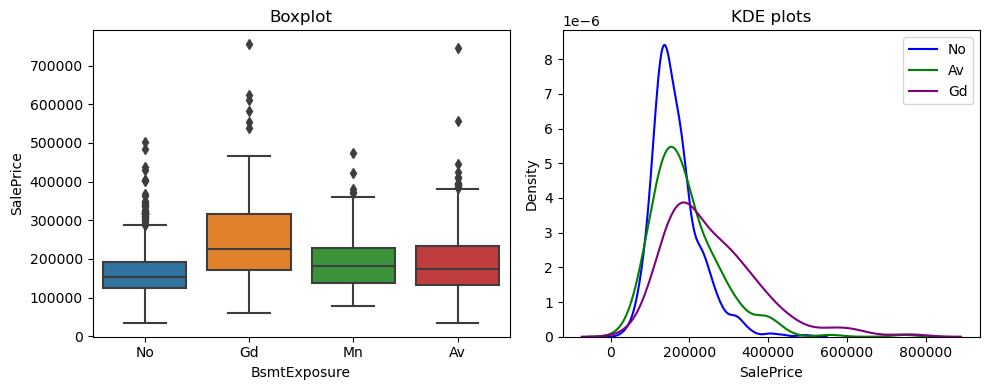

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['BsmtExposure'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtExposure'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'No'], x='SalePrice', color="blue", label="No", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Av'], x='SalePrice', color="green", label="Av", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Gd'], x='SalePrice', color="purple", label="Gd", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### BsmtFinType1

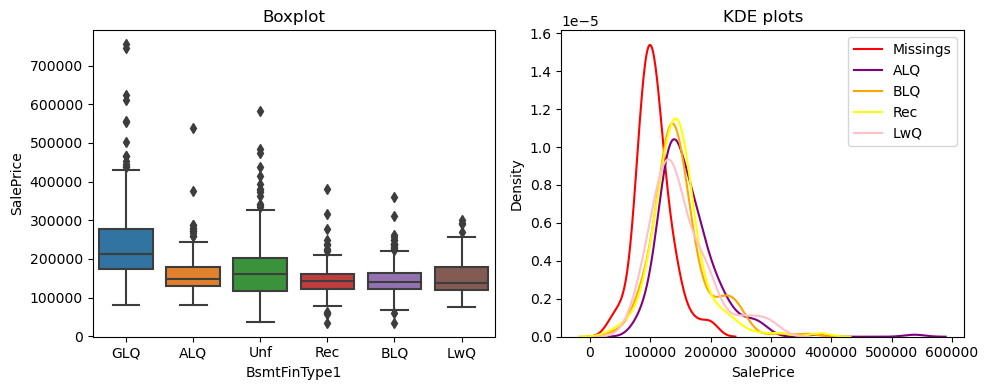

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['BsmtFinType1'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType1'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'ALQ'], x='SalePrice', color="purple", label="ALQ", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'BLQ'], x='SalePrice', color="orange", label="BLQ", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'Rec'], x='SalePrice', color="yellow", label="Rec", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'LwQ'], x='SalePrice', color="pink", label="LwQ", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [125]:
dataset_cat_missing['BsmtFinType1'].fillna('LwQ',inplace=True)
dataHP['BsmtFinType1'] = dataset_cat_missing['BsmtFinType1']

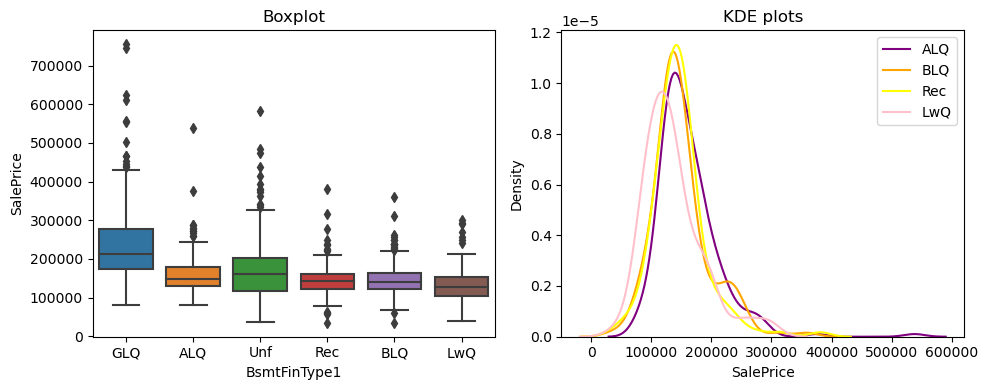

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['BsmtFinType1'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType1'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'ALQ'], x='SalePrice', color="purple", label="ALQ", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'BLQ'], x='SalePrice', color="orange", label="BLQ", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'Rec'], x='SalePrice', color="yellow", label="Rec", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'LwQ'], x='SalePrice', color="pink", label="LwQ", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### BsmtFinType2

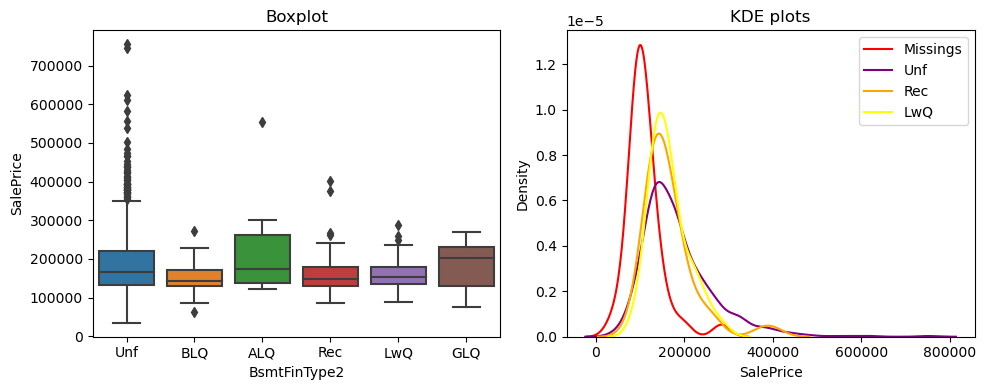

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['BsmtFinType2'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType2'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Unf'], x='SalePrice', color="purple", label="Unf", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Rec'], x='SalePrice', color="orange", label="Rec", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'LwQ'], x='SalePrice', color="yellow", label="LwQ", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [126]:
dataset_cat_missing['BsmtFinType2'].fillna('Rec',inplace=True)
dataHP['BsmtFinType2'] = dataset_cat_missing['BsmtFinType2']

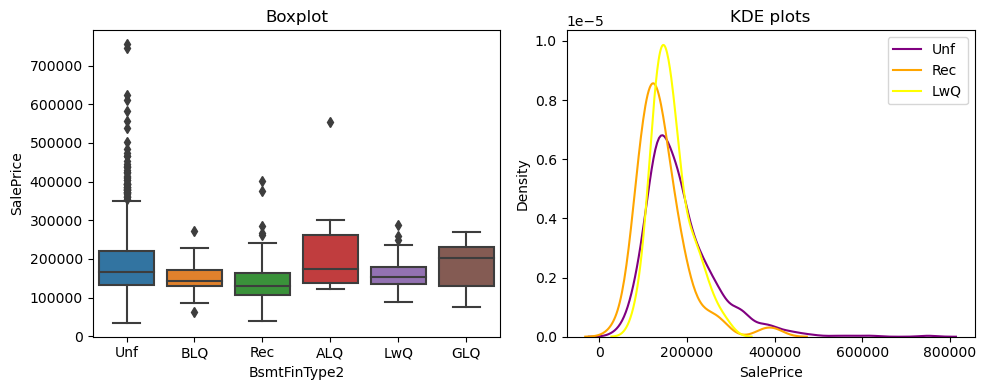

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['BsmtFinType2'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType2'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Unf'], x='SalePrice', color="purple", label="Unf", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Rec'], x='SalePrice', color="orange", label="Rec", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'LwQ'], x='SalePrice', color="yellow", label="LwQ", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### Electrical

C:\Users\52334879\AppData\Local\Temp\ipykernel_36580\3268068303.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Electrical'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
C:\Users\52334879\AppData\Local\Temp\ipykernel_36580\3268068303.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Electrical'] == 'Mix'], x='SalePrice', color="black", label="Mix", ax=axes[1])


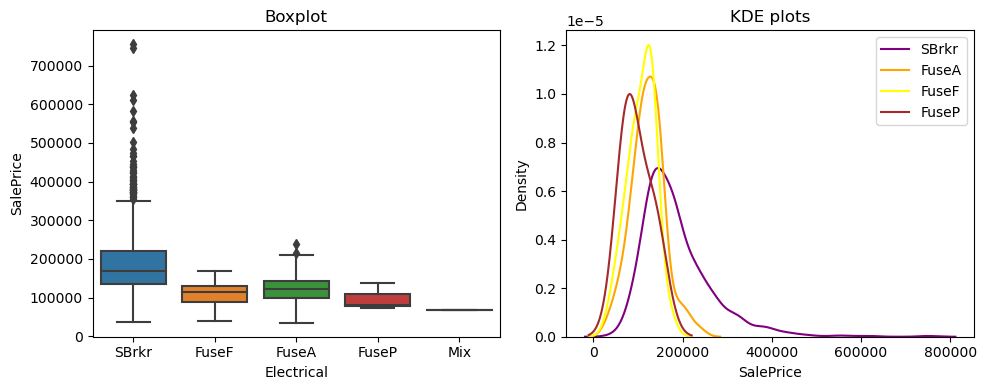

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['Electrical'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Electrical'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Electrical'] == 'SBrkr'], x='SalePrice', color="purple", label="SBrkr", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseA'], x='SalePrice', color="orange", label="FuseA", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseF'], x='SalePrice', color="yellow", label="FuseF", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseP'], x='SalePrice', color="brown", label="FuseP", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Electrical'] == 'Mix'], x='SalePrice', color="black", label="Mix", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### FireplaceQu

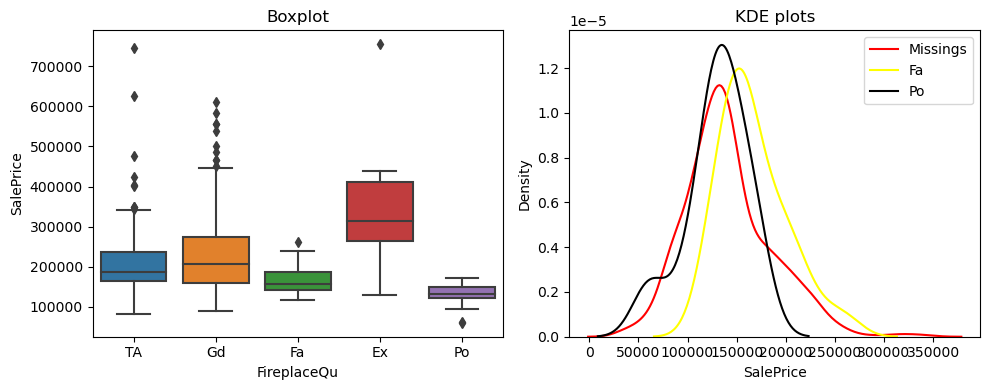

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['FireplaceQu'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Fa'], x='SalePrice', color="yellow", label="Fa", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Po'], x='SalePrice', color="black", label="Po", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [127]:
dataset_cat_missing['FireplaceQu'].fillna('Fa',inplace=True)
dataHP['FireplaceQu'] = dataset_cat_missing['FireplaceQu']

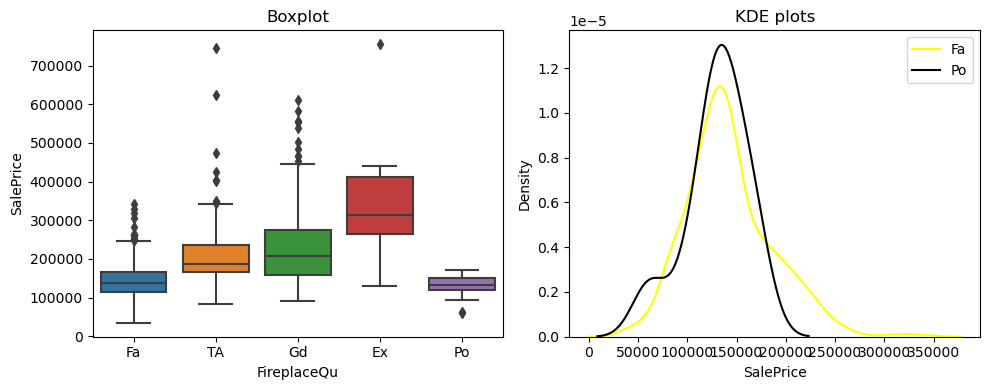

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['FireplaceQu'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Fa'], x='SalePrice', color="yellow", label="Fa", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Po'], x='SalePrice', color="black", label="Po", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### GarageType

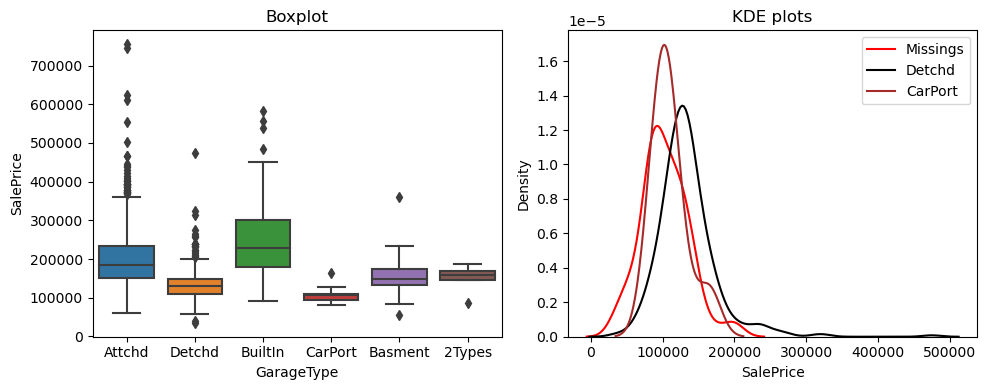

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['GarageType'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageType'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageType'] == 'Detchd'], x='SalePrice', color="black", label="Detchd", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageType'] == 'CarPort'], x='SalePrice', color="brown", label="CarPort", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [128]:
dataset_cat_missing['GarageType'].fillna('CarPort',inplace=True)
dataHP['GarageType'] = dataset_cat_missing['GarageType']

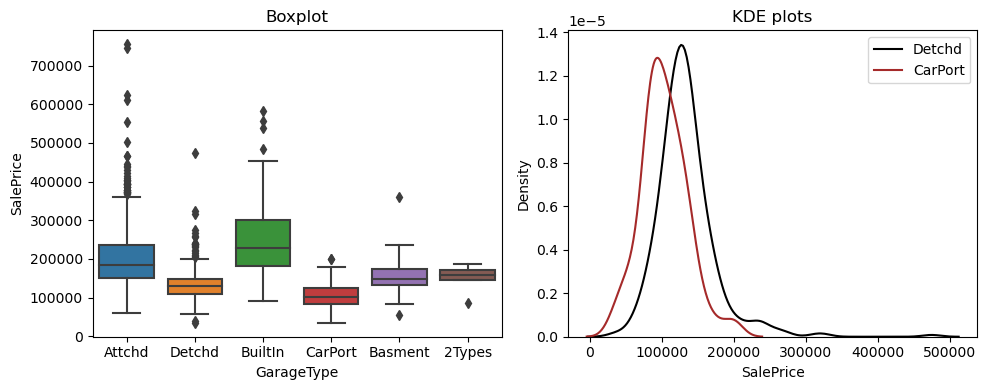

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['GarageType'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageType'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageType'] == 'Detchd'], x='SalePrice', color="black", label="Detchd", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageType'] == 'CarPort'], x='SalePrice', color="brown", label="CarPort", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### GarageFinish

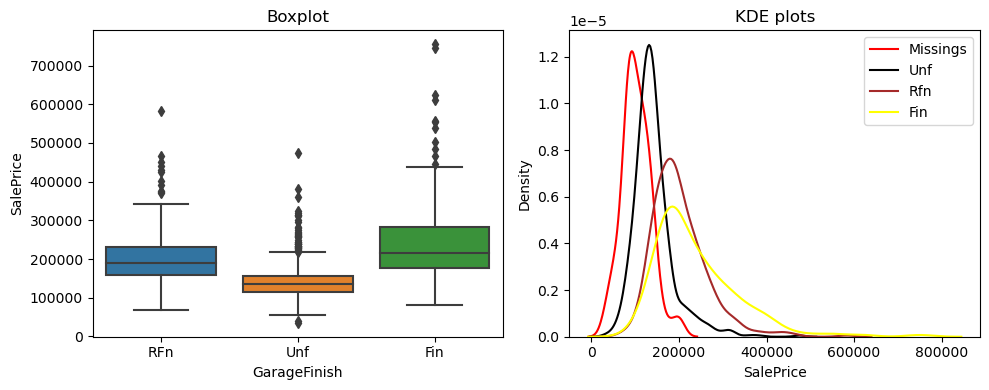

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['GarageFinish'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageFinish'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'Unf'], x='SalePrice', color="black", label="Unf", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'RFn'], x='SalePrice', color="brown", label="Rfn", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'Fin'], x='SalePrice', color="yellow", label="Fin", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [129]:
dataset_cat_missing['GarageFinish'].fillna('Unf',inplace=True)
dataHP['GarageFinish'] = dataset_cat_missing['GarageFinish']

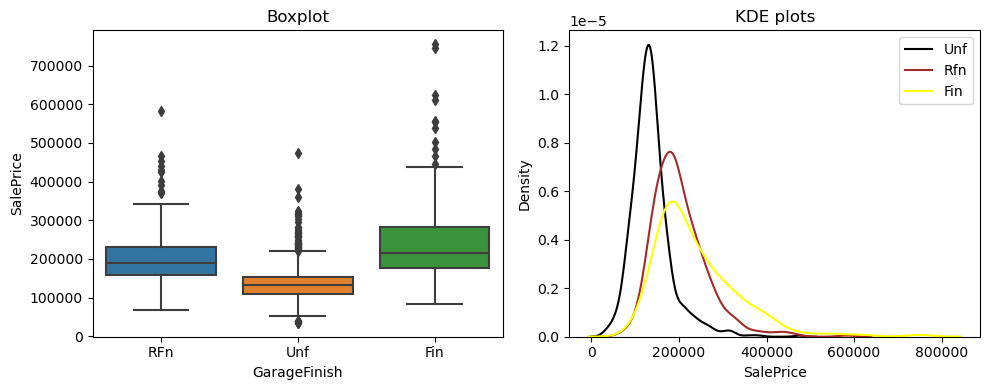

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['GarageFinish'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageFinish'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'Unf'], x='SalePrice', color="black", label="Unf", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'RFn'], x='SalePrice', color="brown", label="Rfn", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'Fin'], x='SalePrice', color="yellow", label="Fin", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### GarageQual

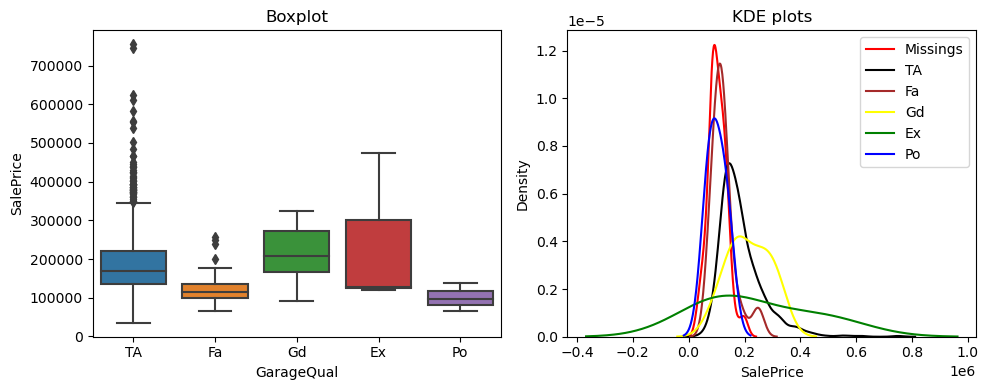

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['GarageQual'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'TA'], x='SalePrice', color="black", label="TA", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Fa'], x='SalePrice', color="brown", label="Fa", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Gd'], x='SalePrice', color="yellow", label="Gd", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Ex'], x='SalePrice', color="green", label="Ex", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Po'], x='SalePrice', color="blue", label="Po", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [130]:
dataset_cat_missing['GarageQual'].fillna('Fa',inplace=True)
dataHP['GarageQual'] = dataset_cat_missing['GarageQual']

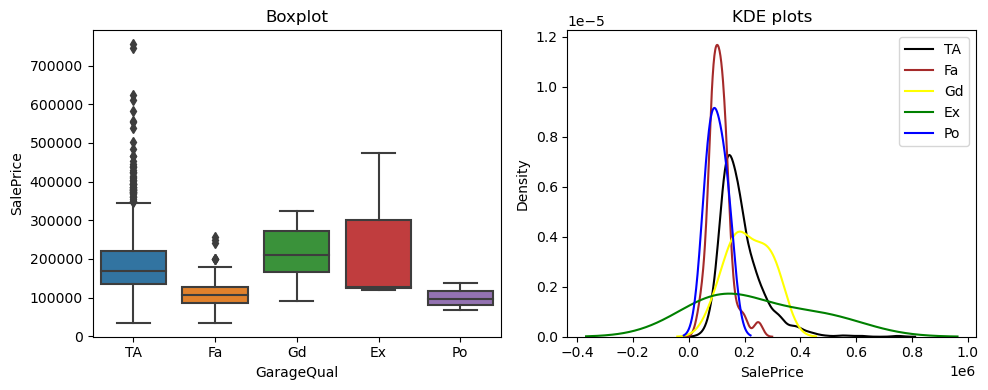

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['GarageQual'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'TA'], x='SalePrice', color="black", label="TA", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Fa'], x='SalePrice', color="brown", label="Fa", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Gd'], x='SalePrice', color="yellow", label="Gd", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Ex'], x='SalePrice', color="green", label="Ex", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Po'], x='SalePrice', color="blue", label="Po", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### GarageCond

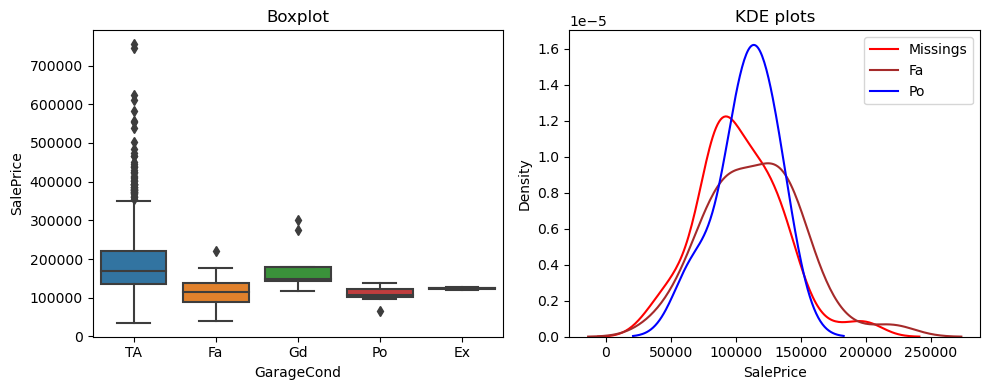

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['GarageCond'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageCond'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Fa'], x='SalePrice', color="brown", label="Fa", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Po'], x='SalePrice', color="blue", label="Po", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [131]:
dataset_cat_missing['GarageCond'].fillna('Fa',inplace=True)
dataHP['GarageCond'] = dataset_cat_missing['GarageCond']

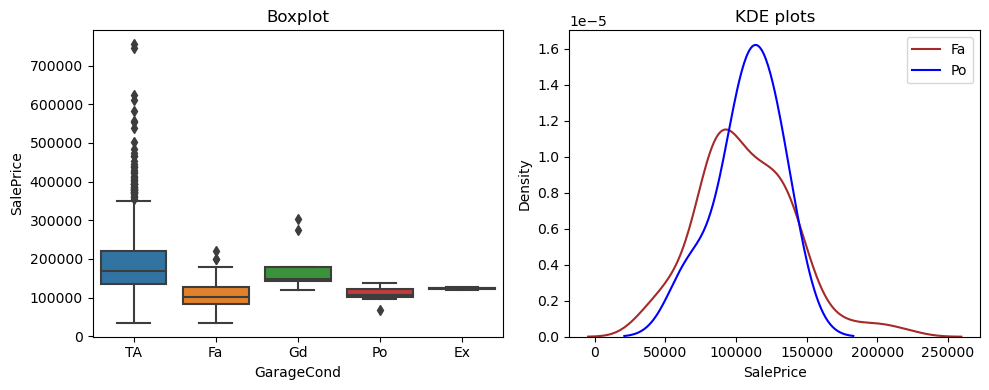

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['GarageCond'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageCond'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Fa'], x='SalePrice', color="brown", label="Fa", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Po'], x='SalePrice', color="blue", label="Po", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### PoolQC

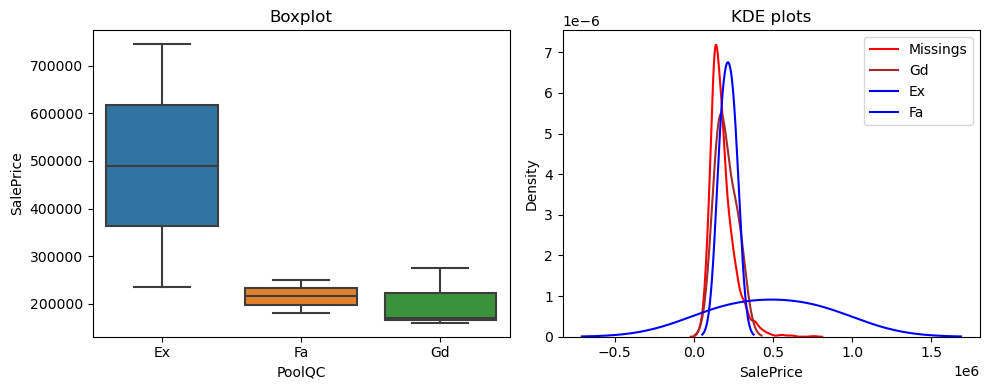

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['PoolQC'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['PoolQC'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['PoolQC'] == 'Gd'], x='SalePrice', color="brown", label="Gd", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['PoolQC'] == 'Ex'], x='SalePrice', color="blue", label="Ex", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['PoolQC'] == 'Fa'], x='SalePrice', color="green", label="Fa", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [76]:
dataset_cat_missing['PoolQC'].fillna('No Pool',inplace=True)
dataHP['PoolQC'] = dataset_cat_missing['PoolQC']

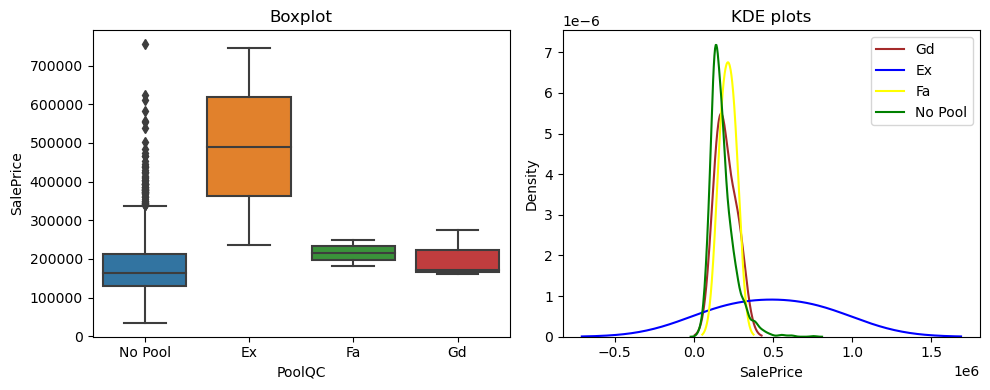

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['PoolQC'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['PoolQC'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['PoolQC'] == 'Gd'], x='SalePrice', color="brown", label="Gd", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['PoolQC'] == 'Ex'], x='SalePrice', color="blue", label="Ex", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['PoolQC'] == 'Fa'], x='SalePrice', color="yellow", label="Fa", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['PoolQC'] == 'No Pool'], x='SalePrice', color="green", label="No Pool", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### Fence

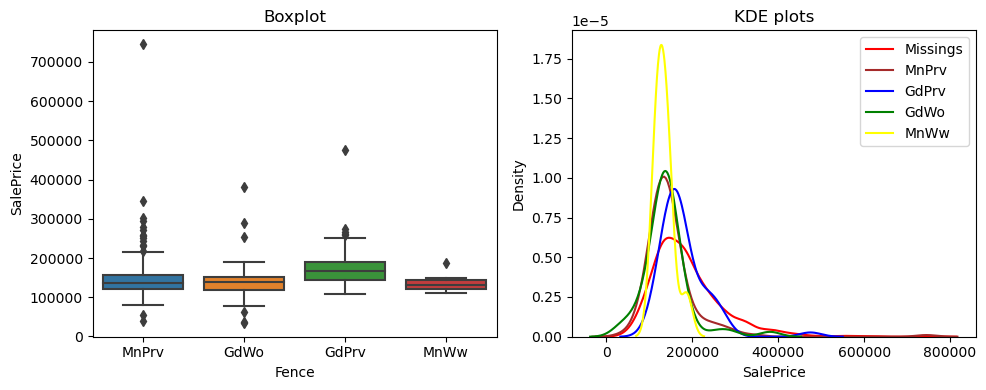

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['Fence'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Fence'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Fence'] == 'MnPrv'], x='SalePrice', color="brown", label="MnPrv", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Fence'] == 'GdPrv'], x='SalePrice', color="blue", label="GdPrv", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Fence'] == 'GdWo'], x='SalePrice', color="green", label="GdWo", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Fence'] == 'MnWw'], x='SalePrice', color="yellow", label="MnWw", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [79]:
dataset_cat_missing['Fence'].fillna('No Fence',inplace=True)
dataHP['Fence'] = dataset_cat_missing['Fence']

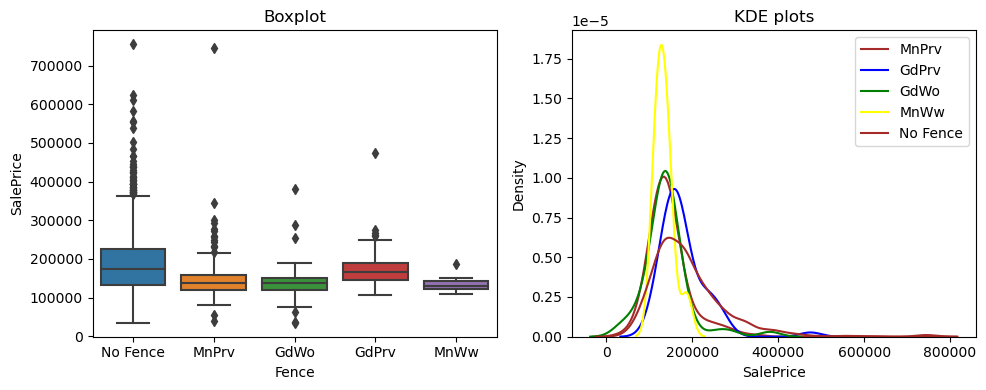

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['Fence'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Fence'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Fence'] == 'MnPrv'], x='SalePrice', color="brown", label="MnPrv", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Fence'] == 'GdPrv'], x='SalePrice', color="blue", label="GdPrv", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Fence'] == 'GdWo'], x='SalePrice', color="green", label="GdWo", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Fence'] == 'MnWw'], x='SalePrice', color="yellow", label="MnWw", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['Fence'] == 'No Fence'], x='SalePrice', color="brown", label="No Fence", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

### MiscFeature

C:\Users\52334879\AppData\Local\Temp\ipykernel_36580\469459156.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'] == 'TenC'], x='SalePrice', color="yellow", label="TenC", ax=axes[1])


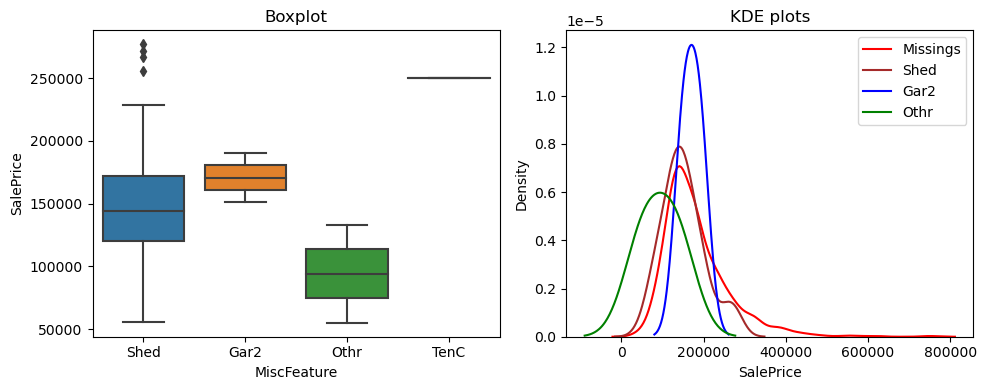

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['MiscFeature'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'] == 'Shed'], x='SalePrice', color="brown", label="Shed", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'] == 'Gar2'], x='SalePrice', color="blue", label="Gar2", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'] == 'Othr'], x='SalePrice', color="green", label="Othr", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'] == 'TenC'], x='SalePrice', color="yellow", label="TenC", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

In [132]:
dataset_cat_missing['MiscFeature'].fillna('No Misc Feature',inplace=True)
dataHP['MiscFeature'] = dataset_cat_missing['MiscFeature']

C:\Users\52334879\AppData\Local\Temp\ipykernel_36580\2773714045.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'] == 'TenC'], x='SalePrice', color="yellow", label="TenC", ax=axes[1])


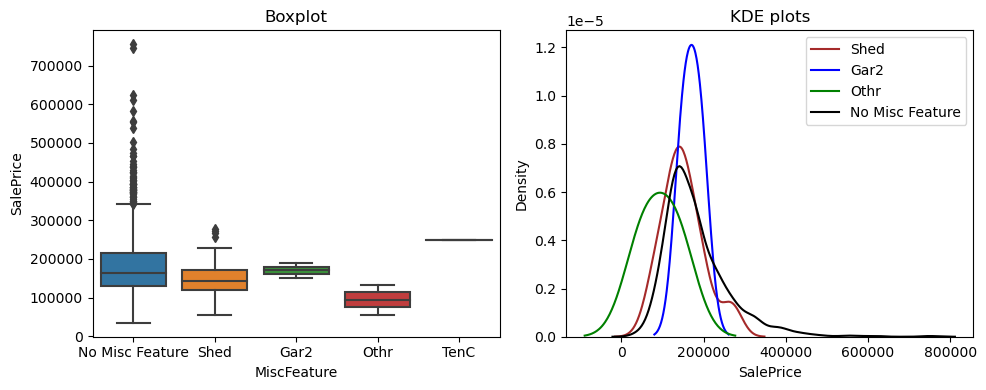

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x=dataset_cat_missing['MiscFeature'], y=dataset_cat_missing['SalePrice'], ax=axes[0])
axes[0].set_title('Boxplot')

sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'].isnull()], x='SalePrice', color="red", label="Missings", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'] == 'Shed'], x='SalePrice', color="brown", label="Shed", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'] == 'Gar2'], x='SalePrice', color="blue", label="Gar2", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'] == 'Othr'], x='SalePrice', color="green", label="Othr", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'] == 'TenC'], x='SalePrice', color="yellow", label="TenC", ax=axes[1])
sns.kdeplot(data=dataset_cat_missing[dataset_cat_missing['MiscFeature'] == 'No Misc Feature'], x='SalePrice', color="black", label="No Misc Feature", ax=axes[1])

axes[1].set_title('KDE plots')

axes[1].legend()
plt.tight_layout()

plt.show()

# 3. Codificacion de Variables Categoricas

In [107]:
dataHP.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Frequency Encoding

In [133]:
column_list = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
               'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
               'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
               'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
               'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for column in column_list:
    freq_map = (dataHP[column].value_counts().sort_values(ascending=False)).to_dict()
    dataHP[column] = dataHP[column].map(freq_map)
    
dataHP.head() 

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60      1151         65.0     8450    1454   1410       925   
1   2          20      1151         80.0     9600    1454   1410       925   
2   3          60      1151         68.0    11250    1454   1410       484   
3   4          70      1151         60.0     9550    1454   1410       484   
4   5          60      1151         84.0    14260    1454   1410       484   

   LandContour  Utilities  ...  MoSold  YrSold  SaleType  SaleCondition  \
0         1311       1459  ...       2    2008      1267           1198   
1         1311       1459  ...       5    2007      1267           1198   
2         1311       1459  ...       9    2008      1267           1198   
3         1311       1459  ...       2    2006      1267            101   
4         1311       1459  ...      12    2008      1267           1198   

   SalePrice  MasVnrArea_Mean  MasVnrArea_Median  GarageYrBlt_Mean  \
0     208500            196.0              196.0            2003.0   
1     181500              0.0                0.0            1976.0   
2     223500            162.0              162.0            2001.0   
3     140000              0.0                0.0            1998.0   
4     250000            350.0              350.0            2000.0   

   GarageYrBlt_Median  LotFrontage_Capping  
0              2003.0                 65.0  
1              1976.0                 80.0  
2              2001.0                 68.0  
3              1998.0                 60.0  
4              2000.0                 84.0  

[5 rows x 86 columns]

# 4. Tratamiento de Outliers

In [135]:
def getColumnTypes(dataset):
  
     continuas = []
     discretas = []
     categoricas = []

     for col in dataset.columns:
          if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
               if(len(dataset[col].unique()) > 30): #criterio para discretas o continuas
                    continuas.append(col)
               else:
                    discretas.append(col)
          else:
               categoricas.append(col)
     return continuas, discretas, categoricas

In [136]:
continuas, discretas, categoricas = getColumnTypes(dataHP)
print(continuas)
print(discretas)
print(categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'MasVnrArea_Mean', 'MasVnrArea_Median', 'GarageYrBlt_Mean', 'GarageYrBlt_Median', 'LotFrontage_Capping']
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 

In [137]:
def plotDistBoxQQ(dataset, col):

     '''
     Descripcion: Muestra las graficas de Distribución, Boxplot y QQ-Plot para detectar Outliers 
     Input: dataset-> pandas dataframe, col->string con nombre de columna
     output: visualiuzación de plots.
     '''
     plt.figure(figsize=(20, 6))
     plt.subplot(1, 3, 1)
     sns.distplot(dataset[col], bins=30)
     plt.title("Histograma y Densisdad")

     plt.subplot(1, 3, 2)
     sns.boxplot(y=dataset[col])
     plt.title("Boxplot")

     plt.subplot(1, 3, 3)
     stats.probplot(dataset[col], dist="norm", plot=plt)

     plt.title("Q-Q Plot")

In [ ]:
for colname in continuas:
    plotDistBoxQQ(dataHP,colname)

In [139]:
def detectOutliersLimits(dataset, col):
     '''
     Descripción: Calcula los limites superiores e inferiores para detección de outliers.
     Input: dataset-> pandas dataframe, col -> string nombre de columna
     Output: tupla de floats con los limites superior e inferior
     '''

     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     LS = dataset[col].quantile(0.75) + (IQR*1.75)

     return LI, LS

In [141]:
for col in continuas:
    LI, LS = detectOutliersLimits(dataHP, col)
    dataHP[col + '_Capping'] = np.where(dataHP[col] > LS, LS,
                                        np.where(dataHP[col] < LI, LI, dataHP[col]))

C:\Users\52334879\AppData\Local\Temp\ipykernel_36580\2085365242.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\52334879\AppData\Local\Temp\ipykernel_36580\2085365242.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\5233487

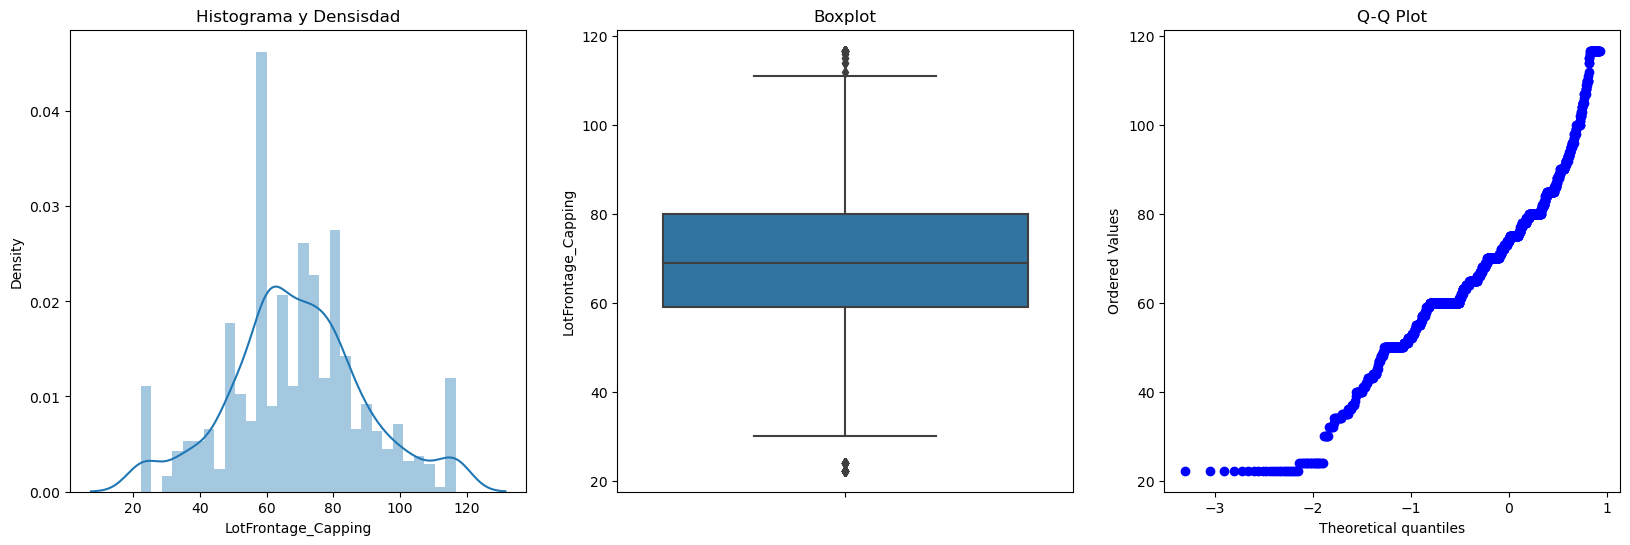

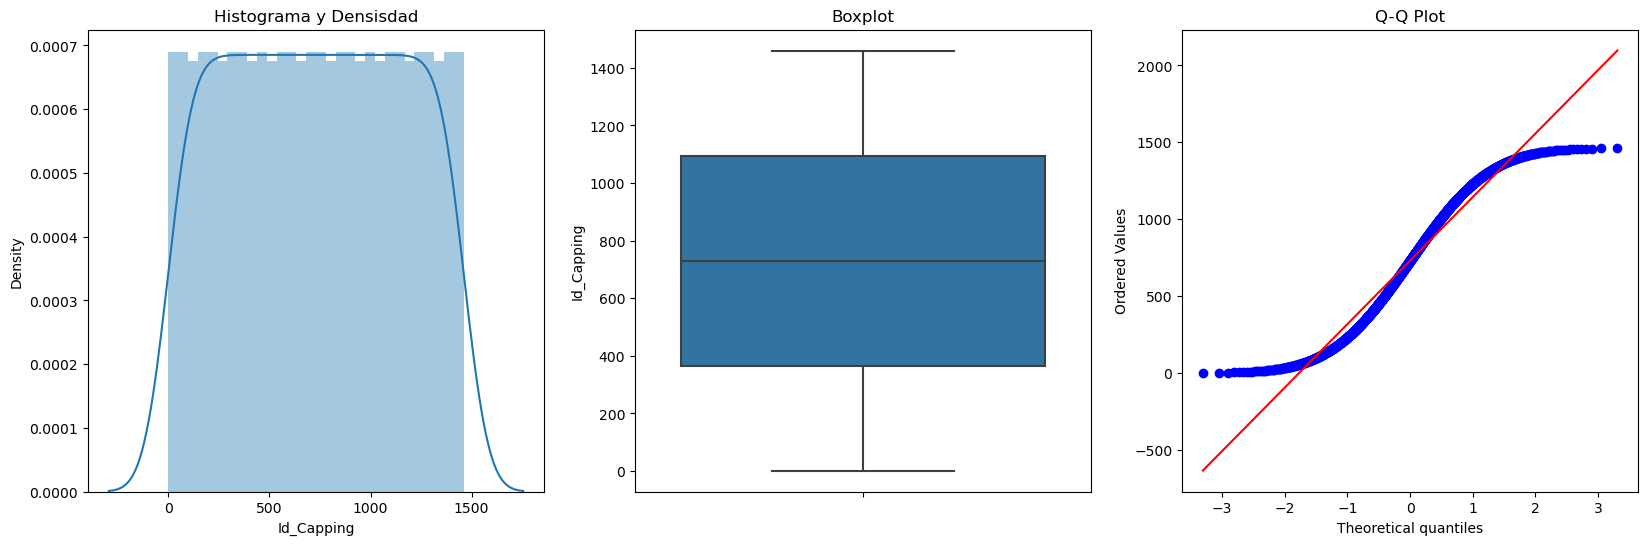

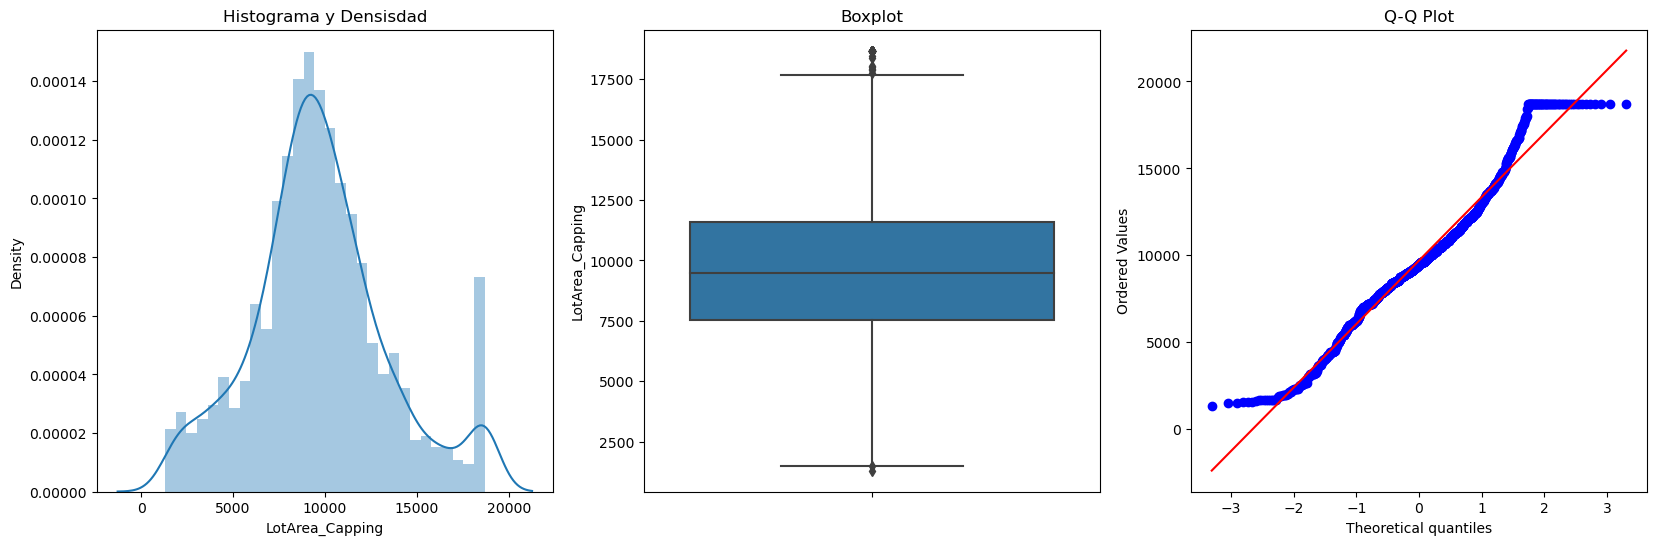

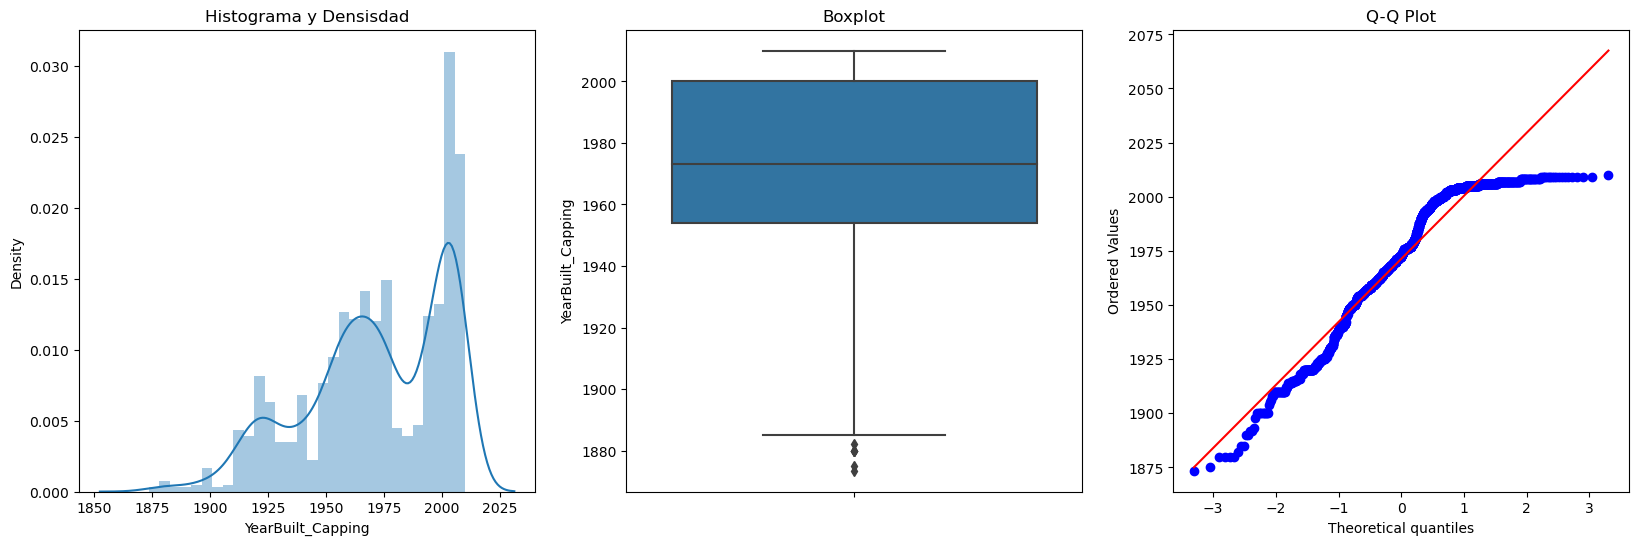

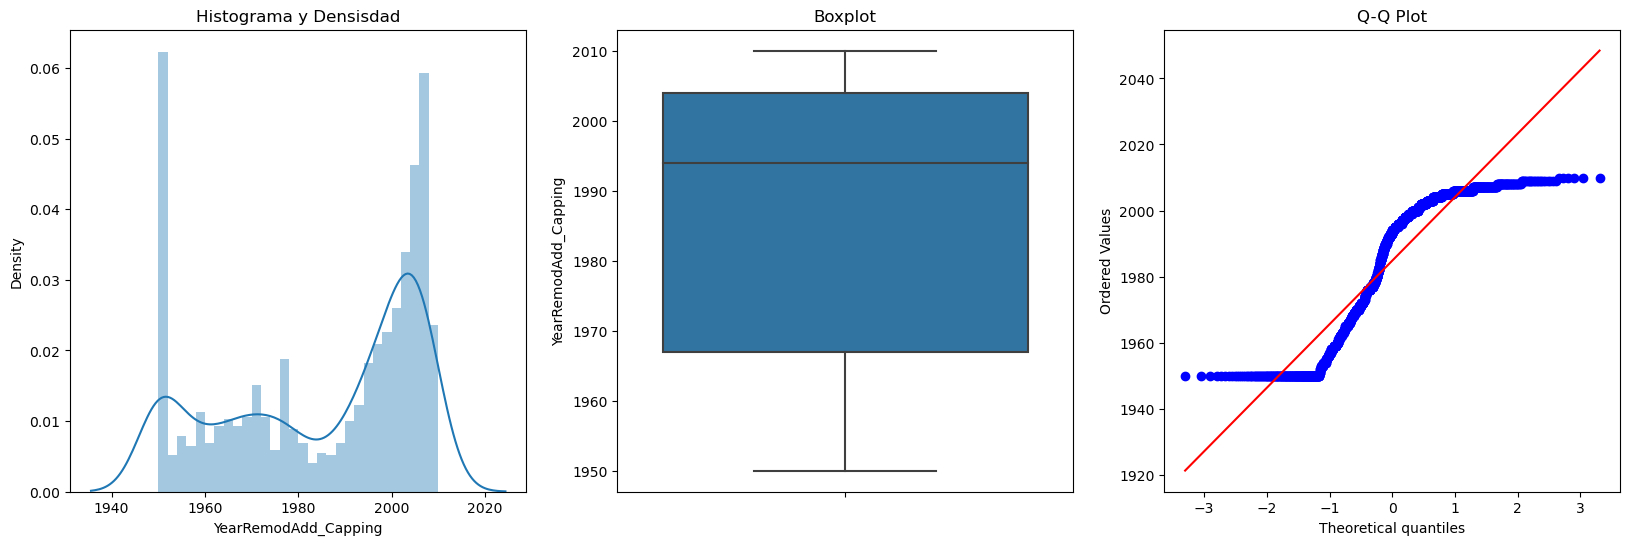

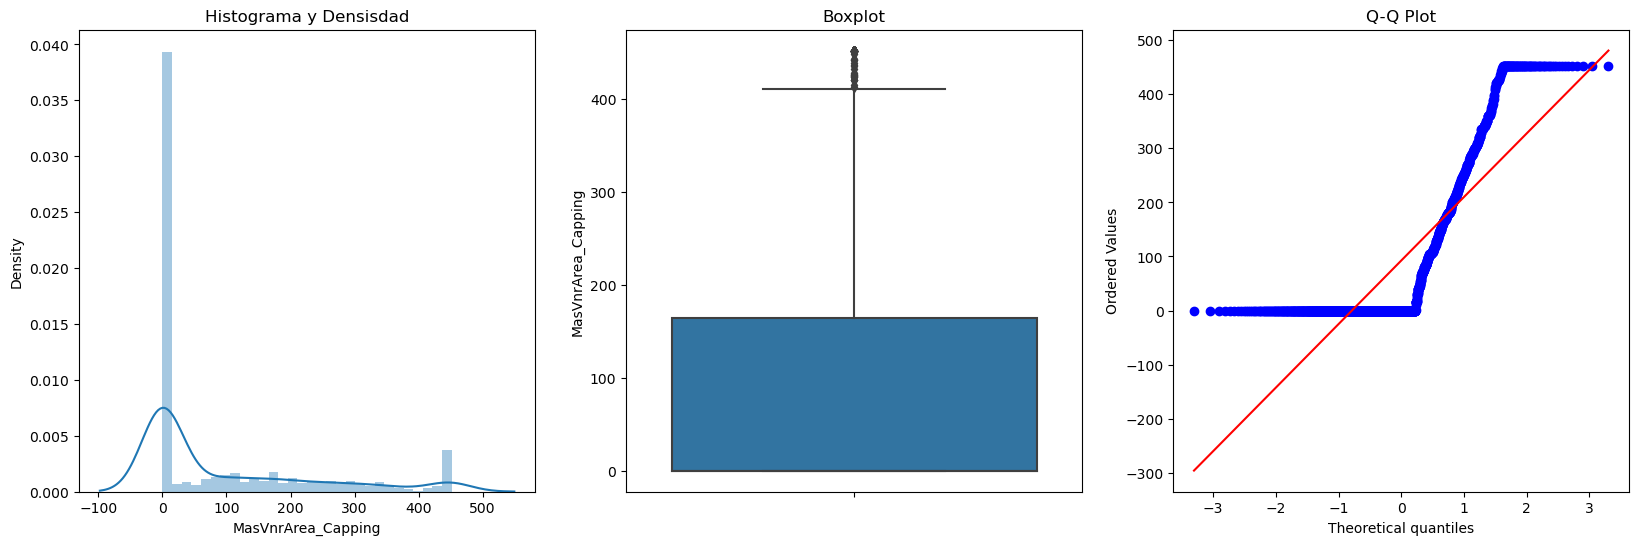

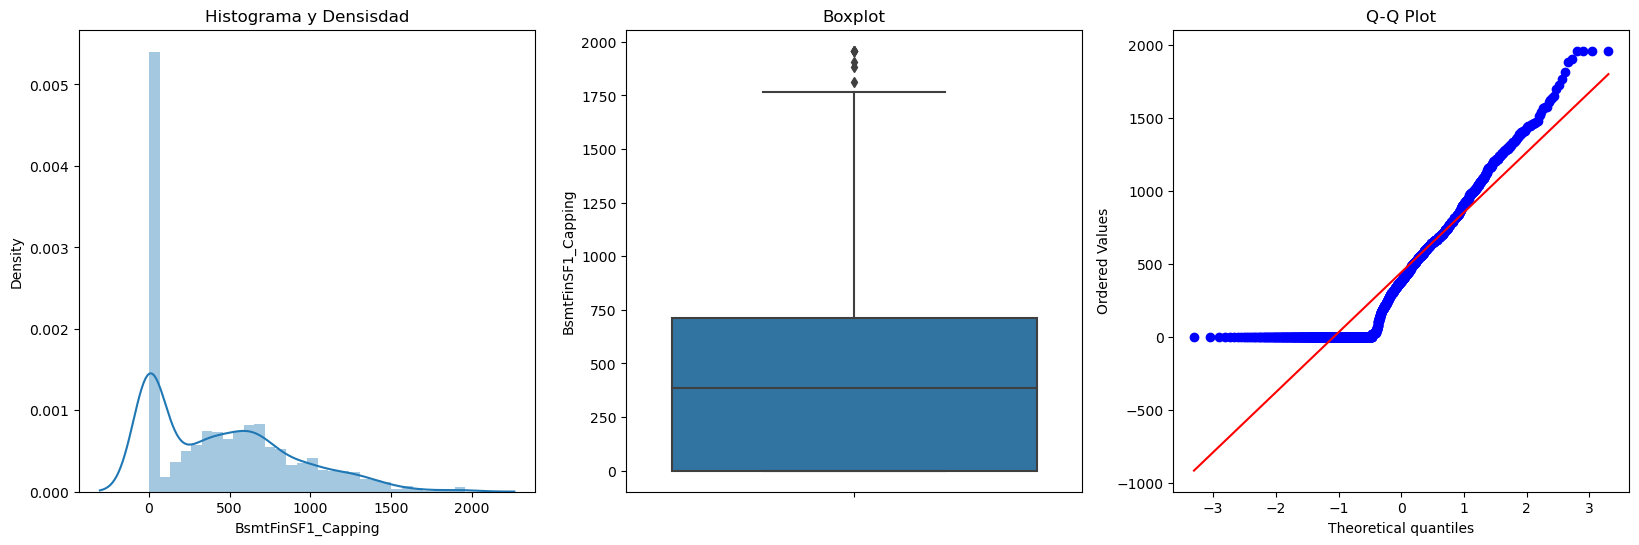

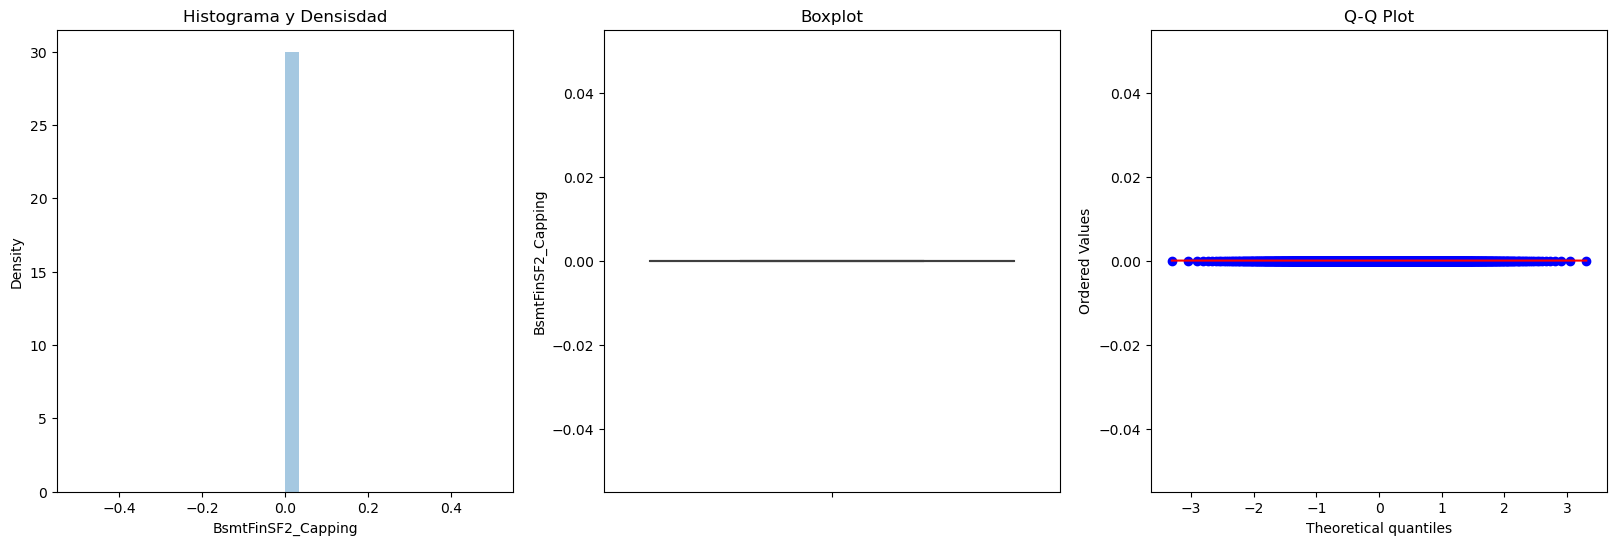

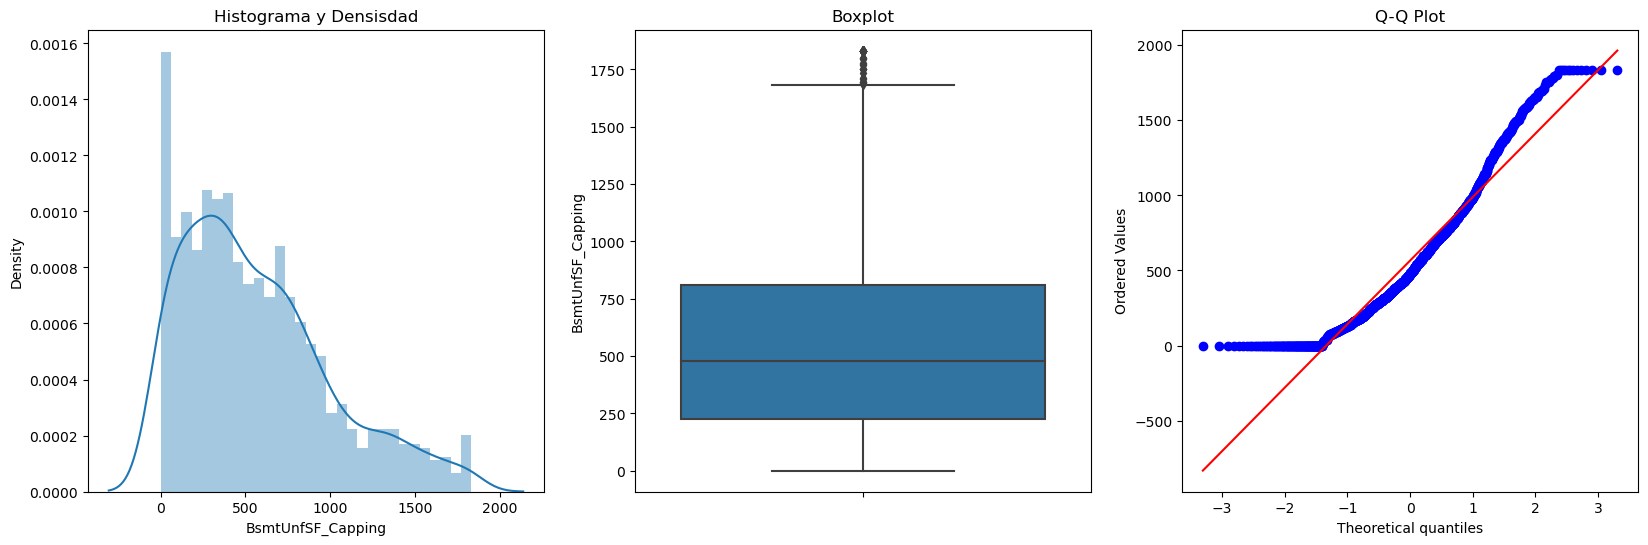

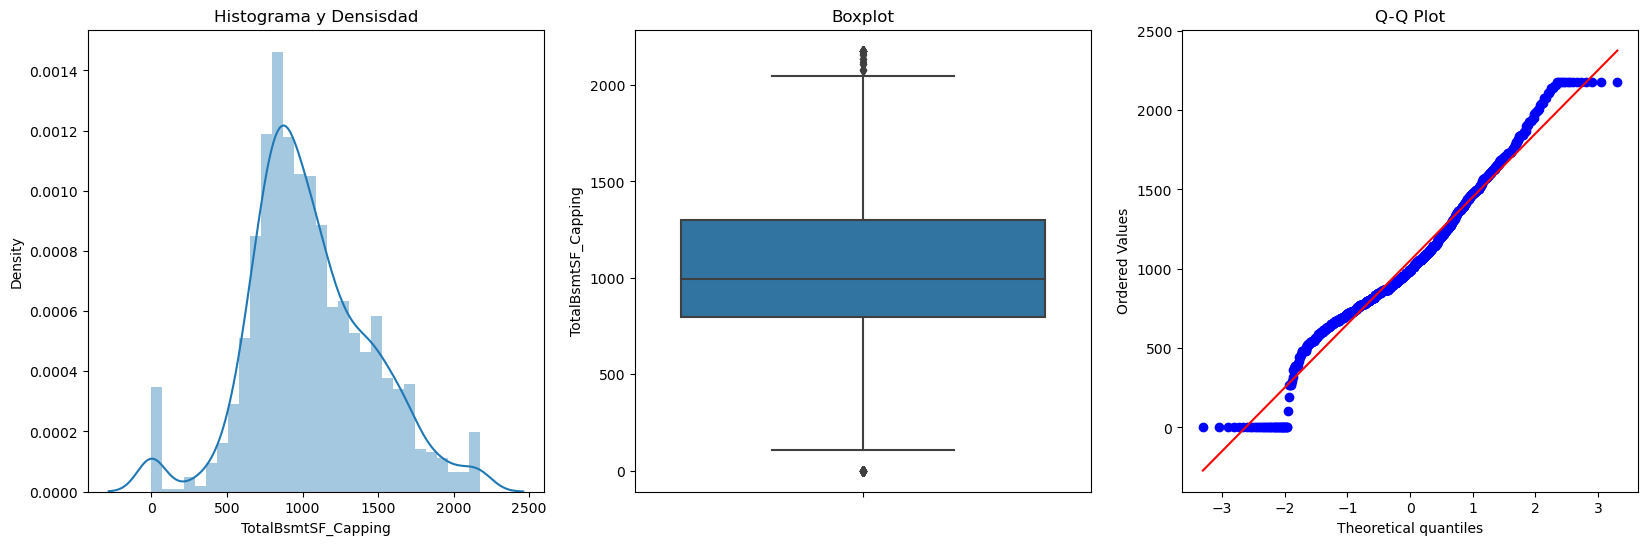

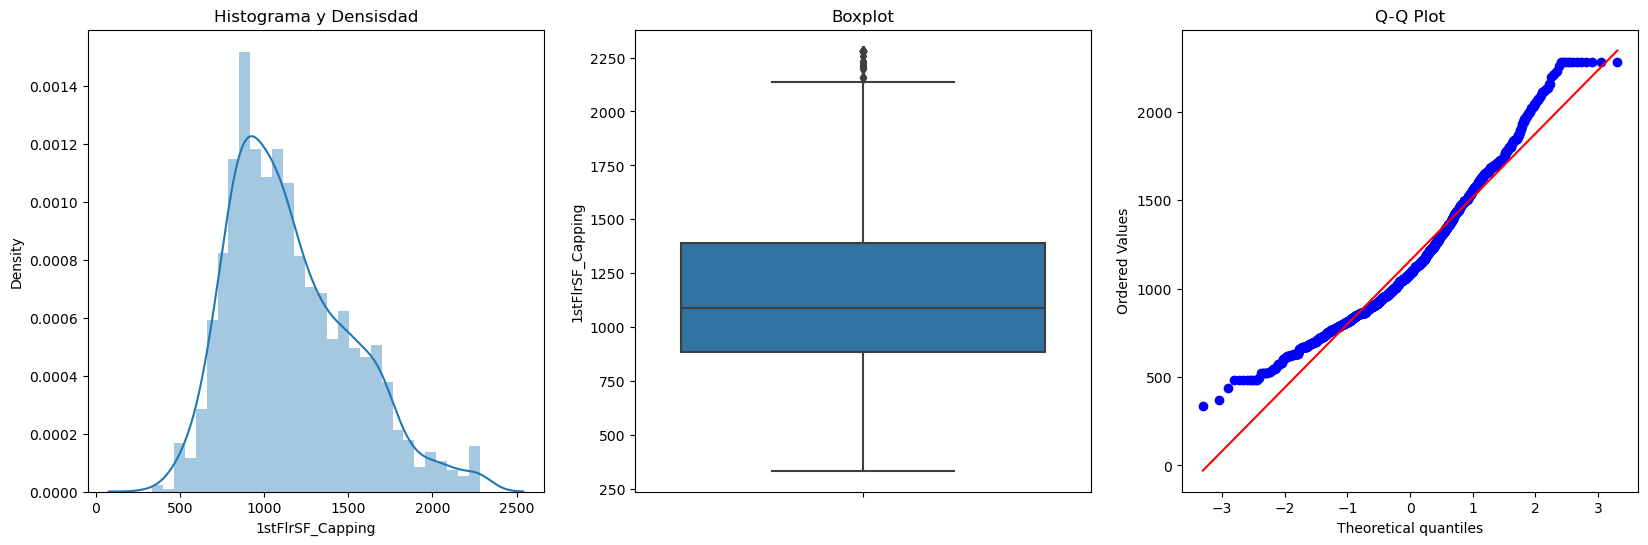

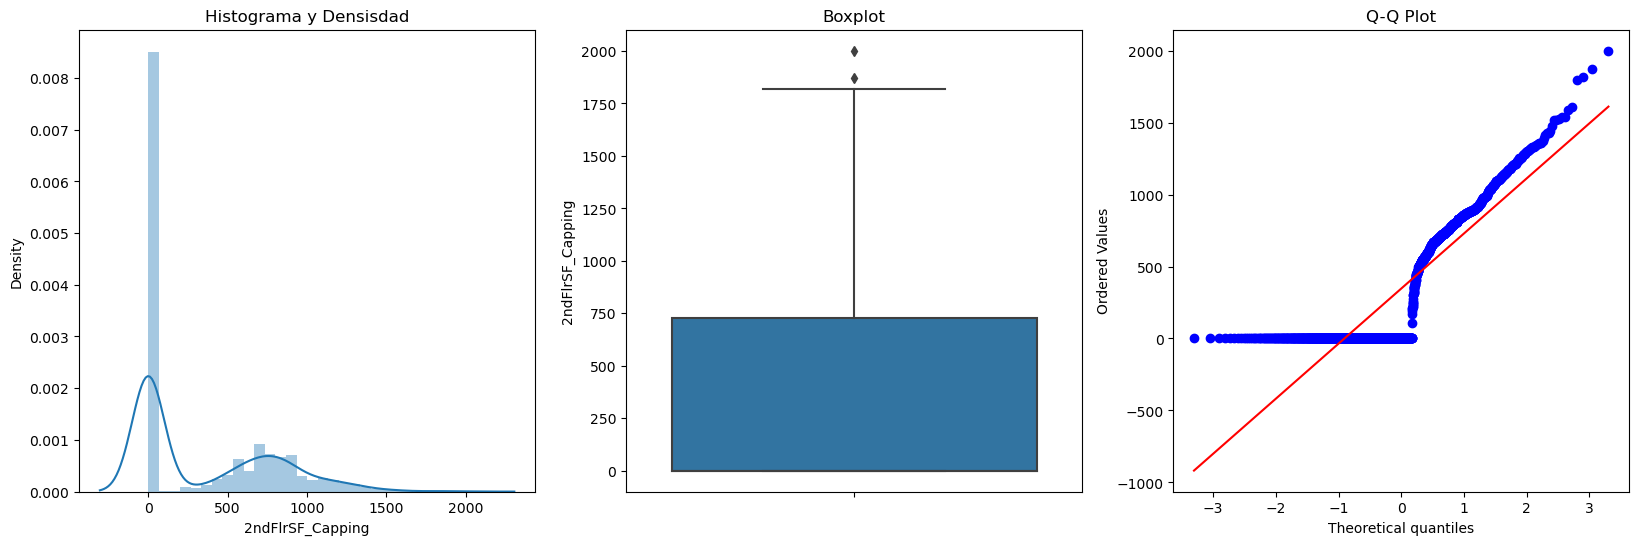

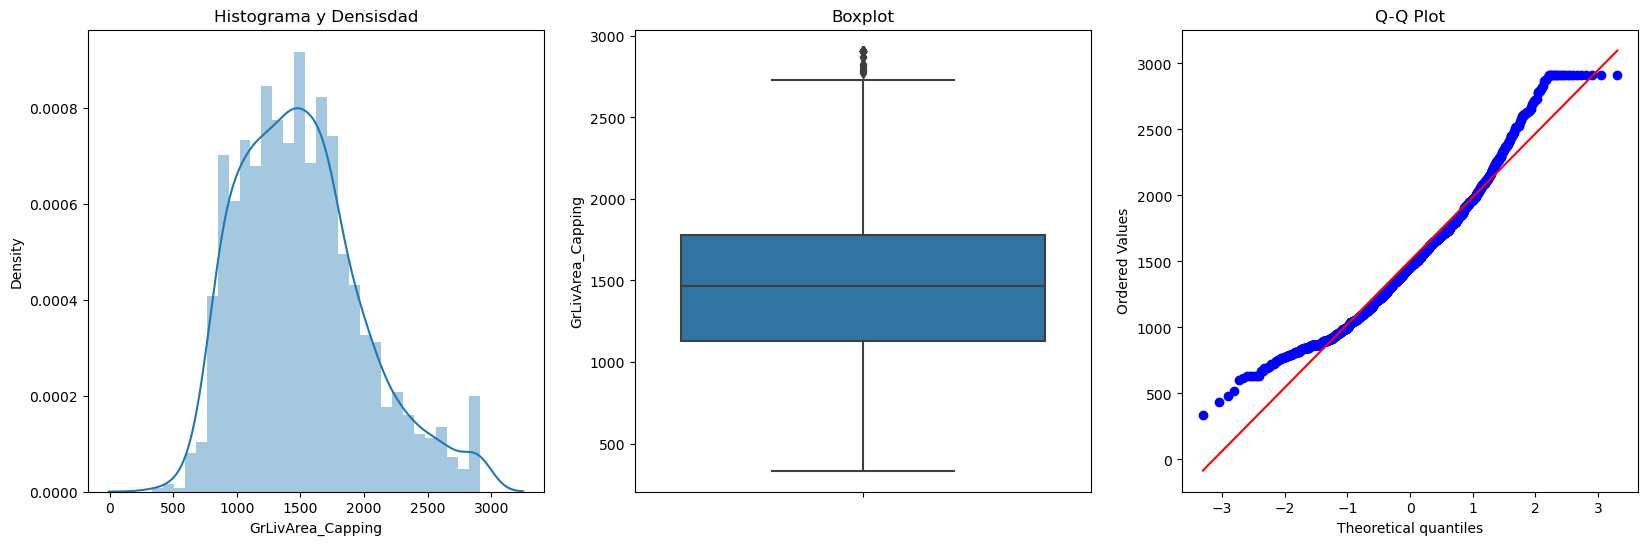

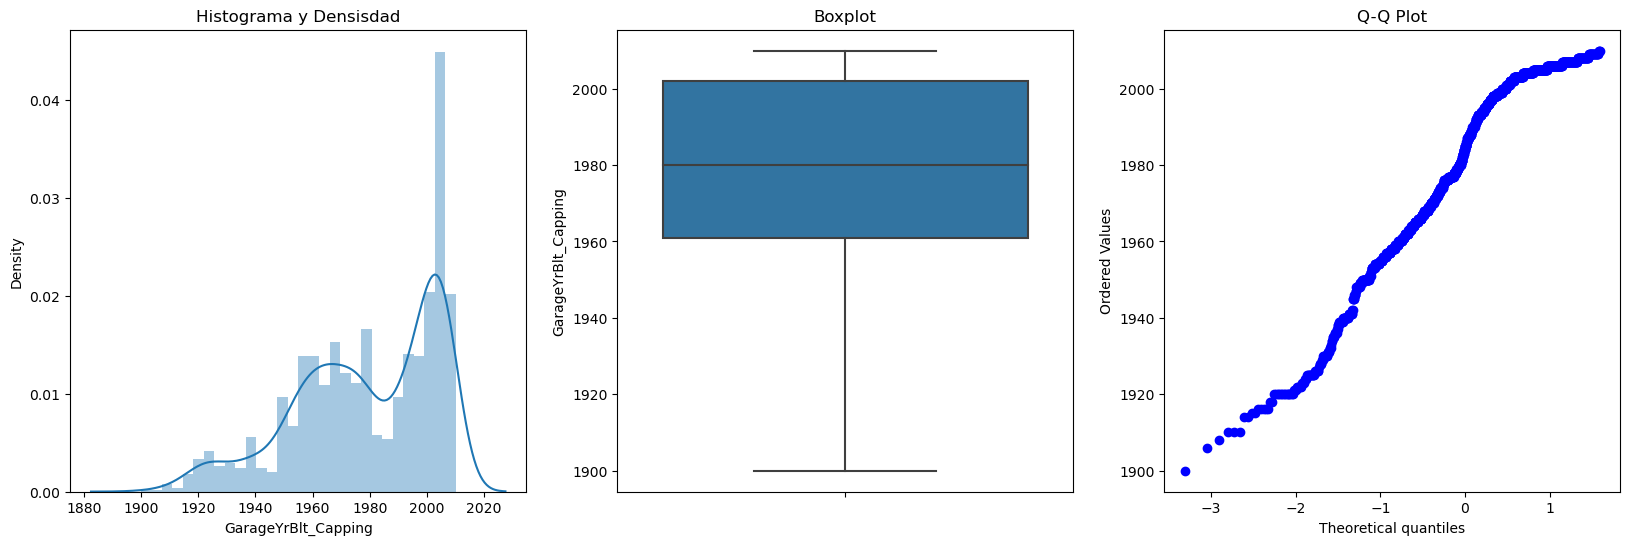

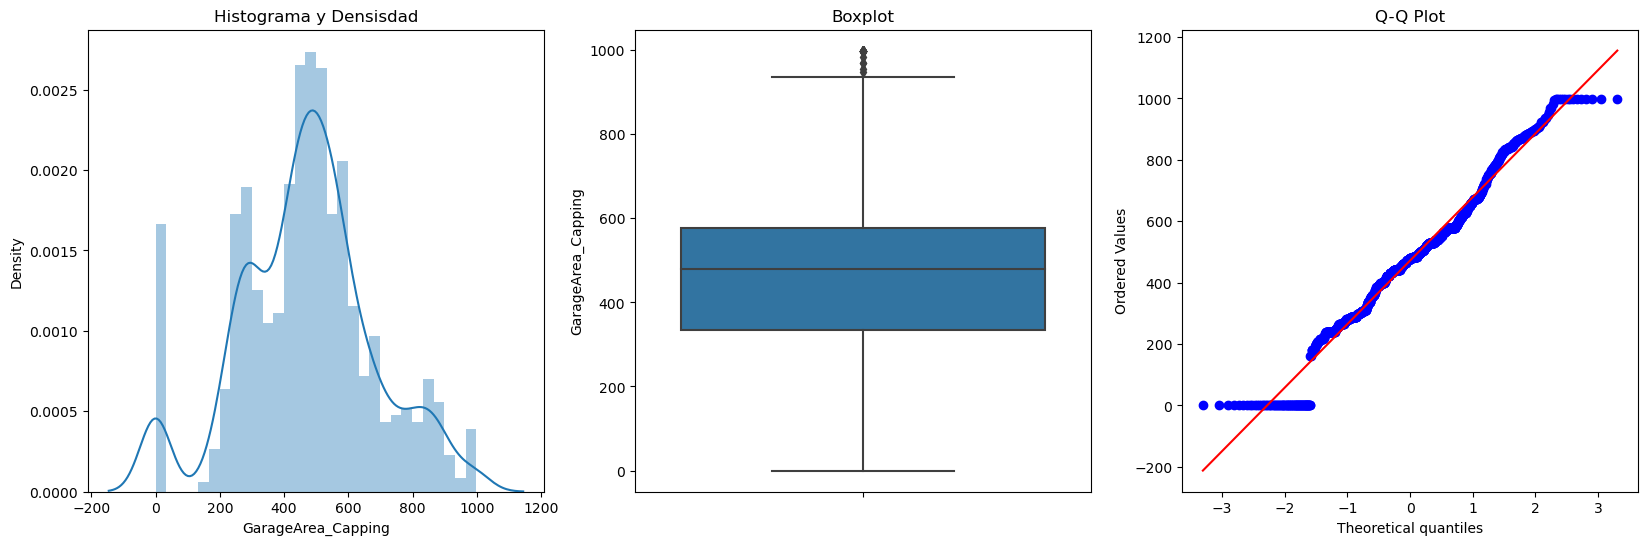

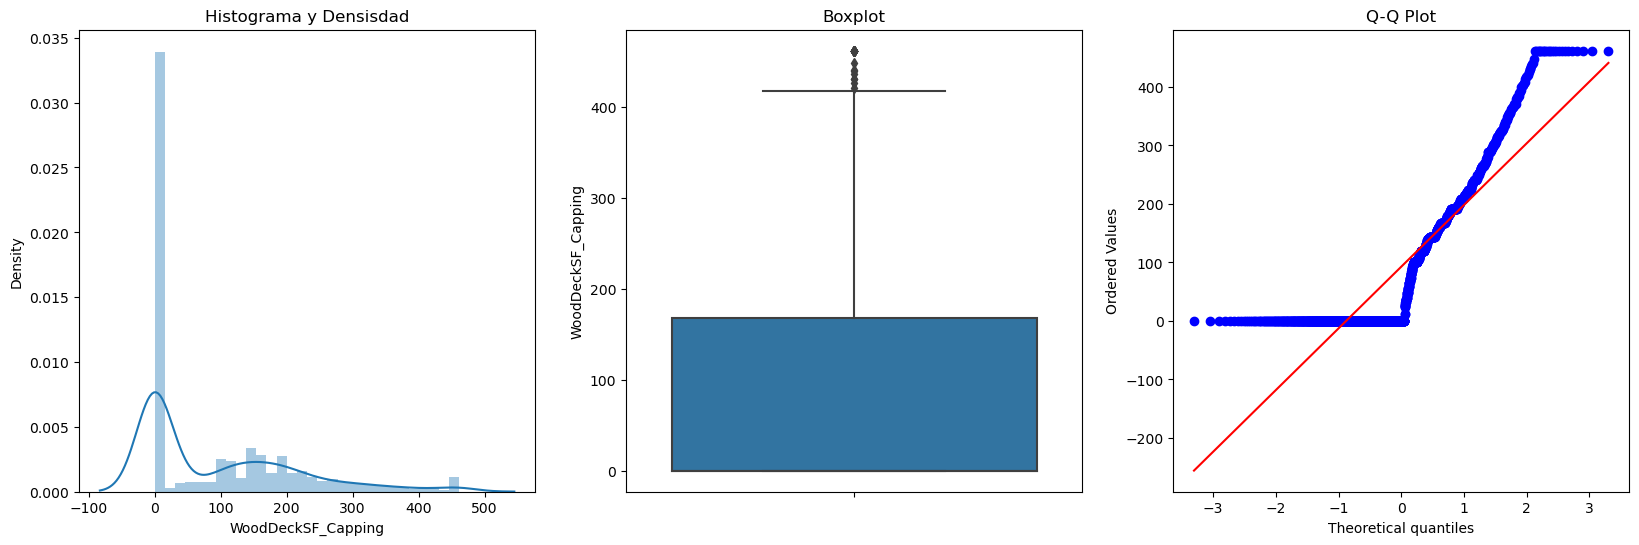

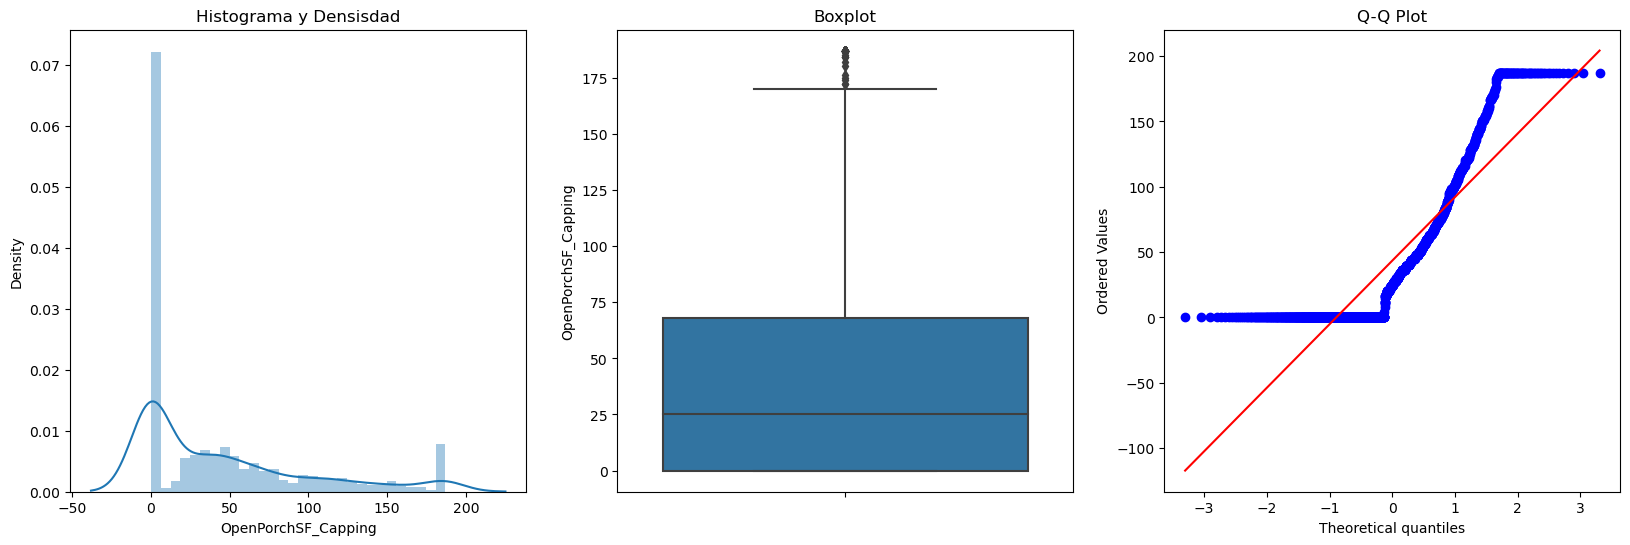

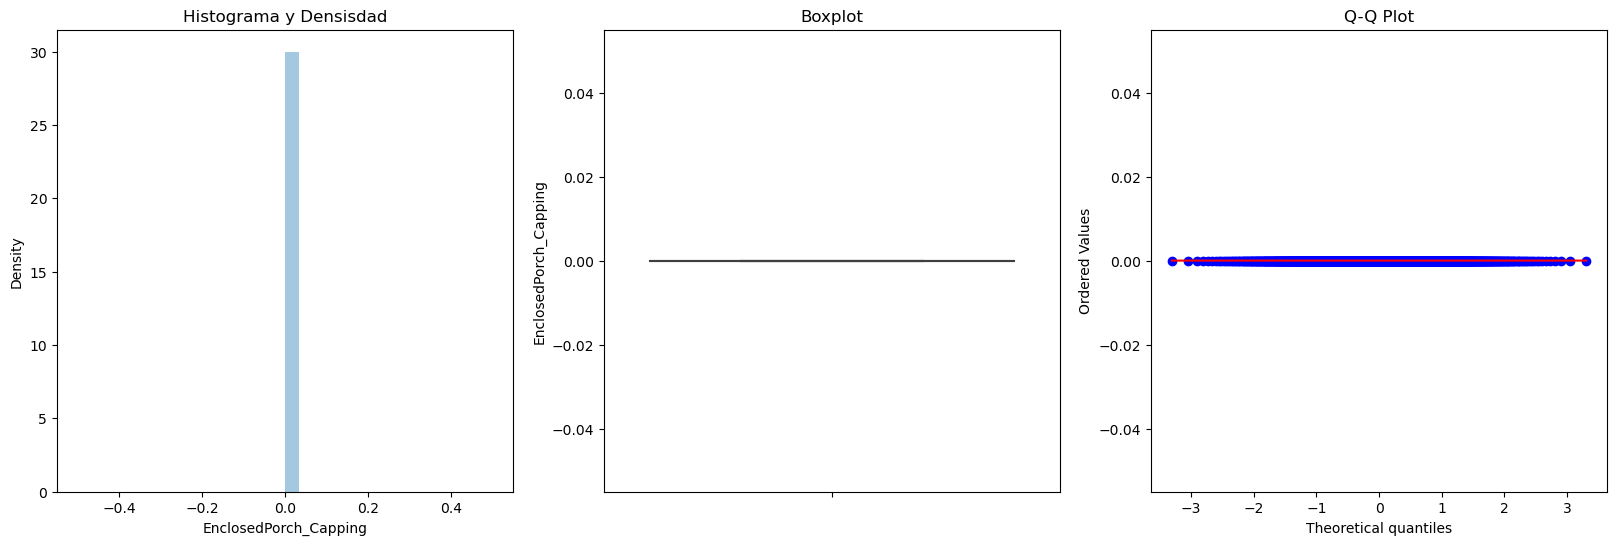

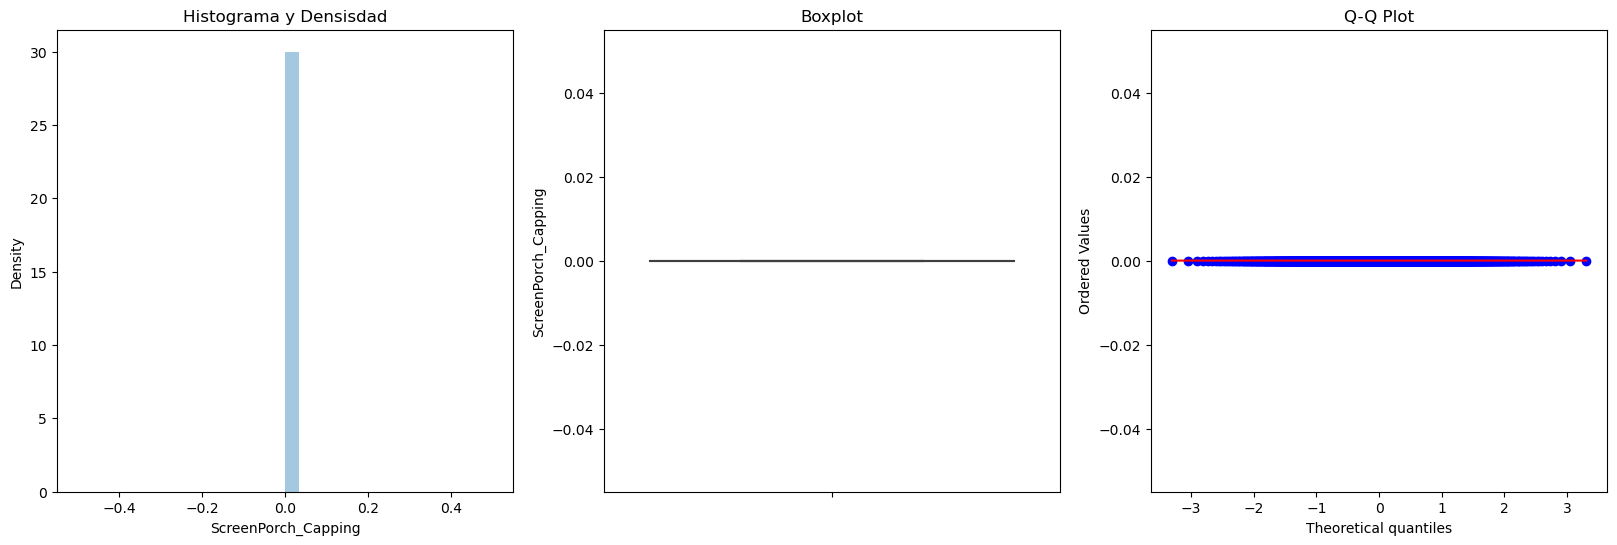

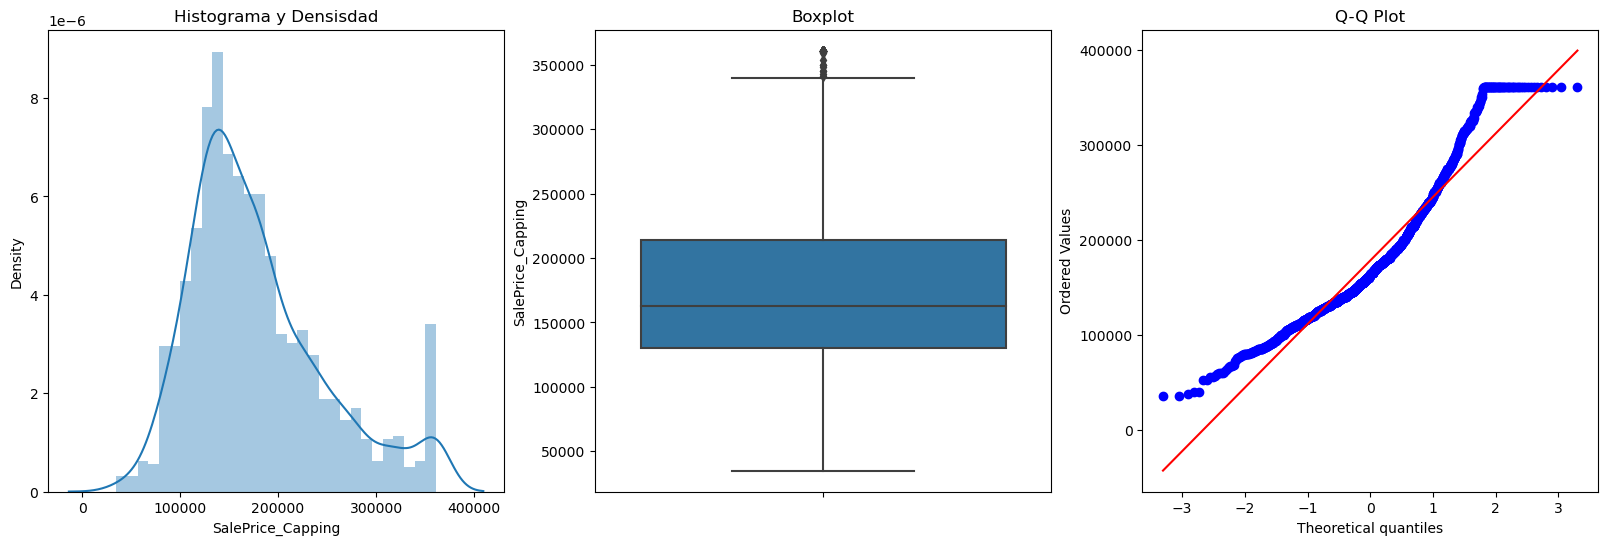

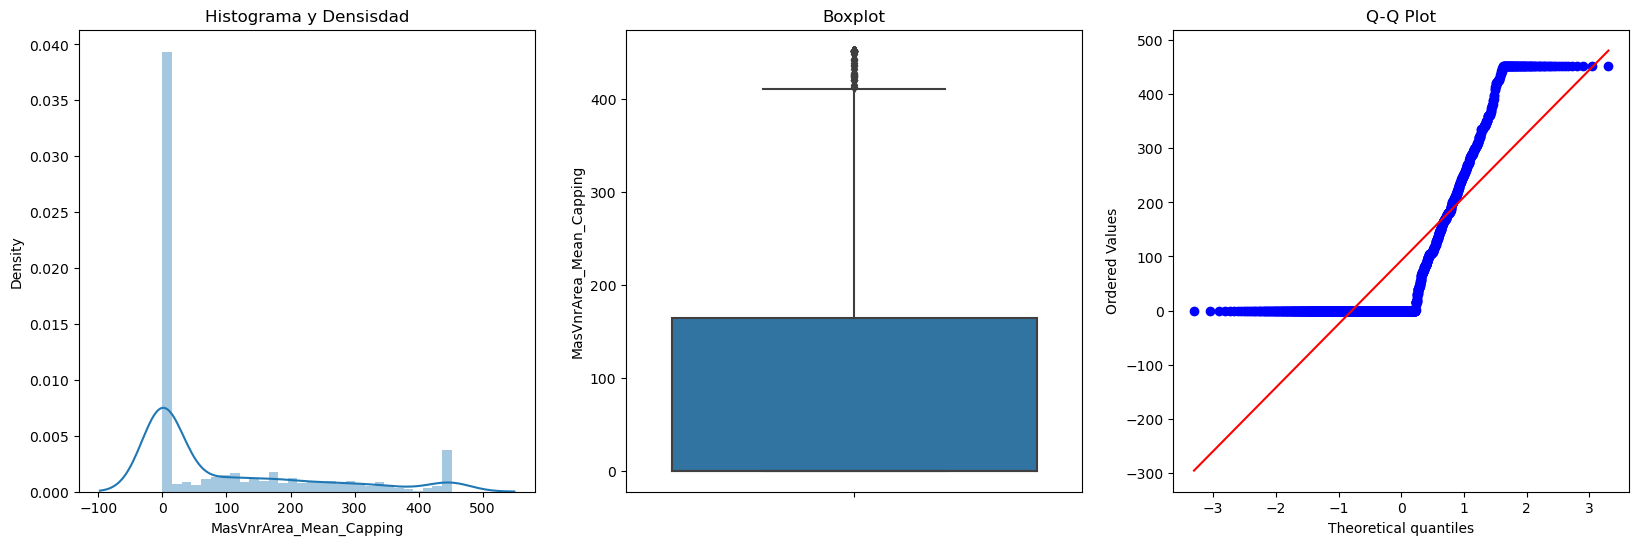

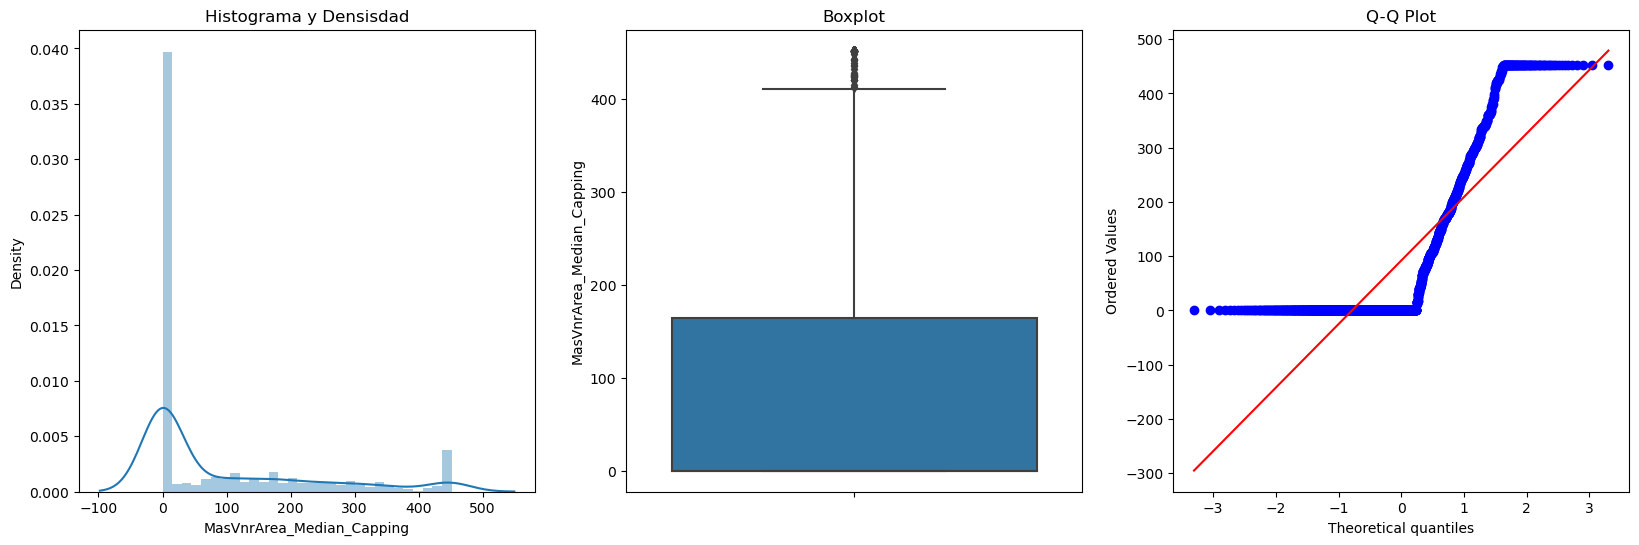

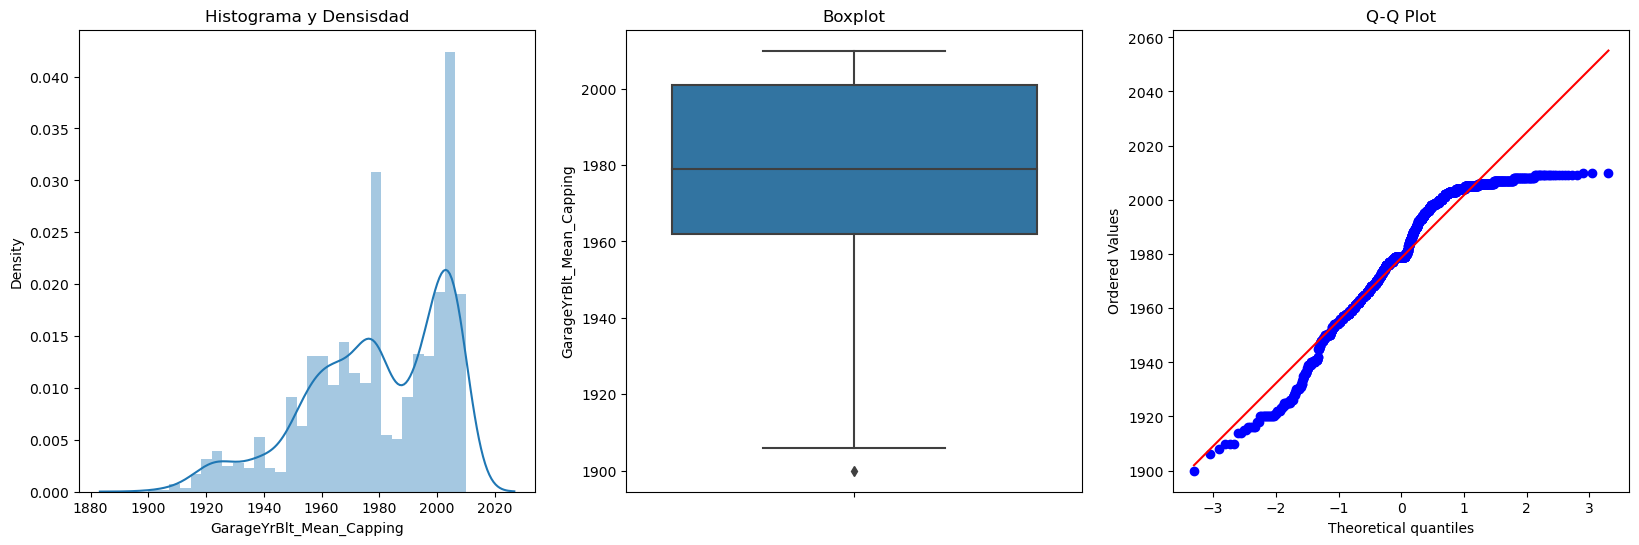

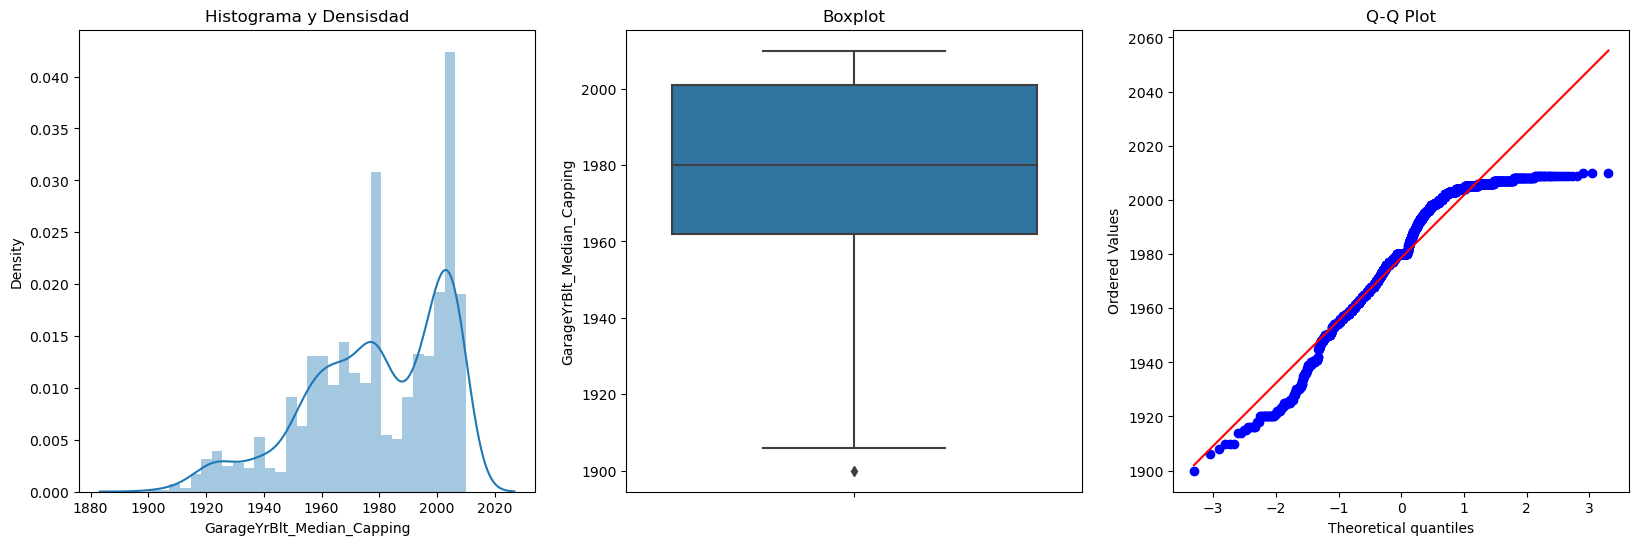

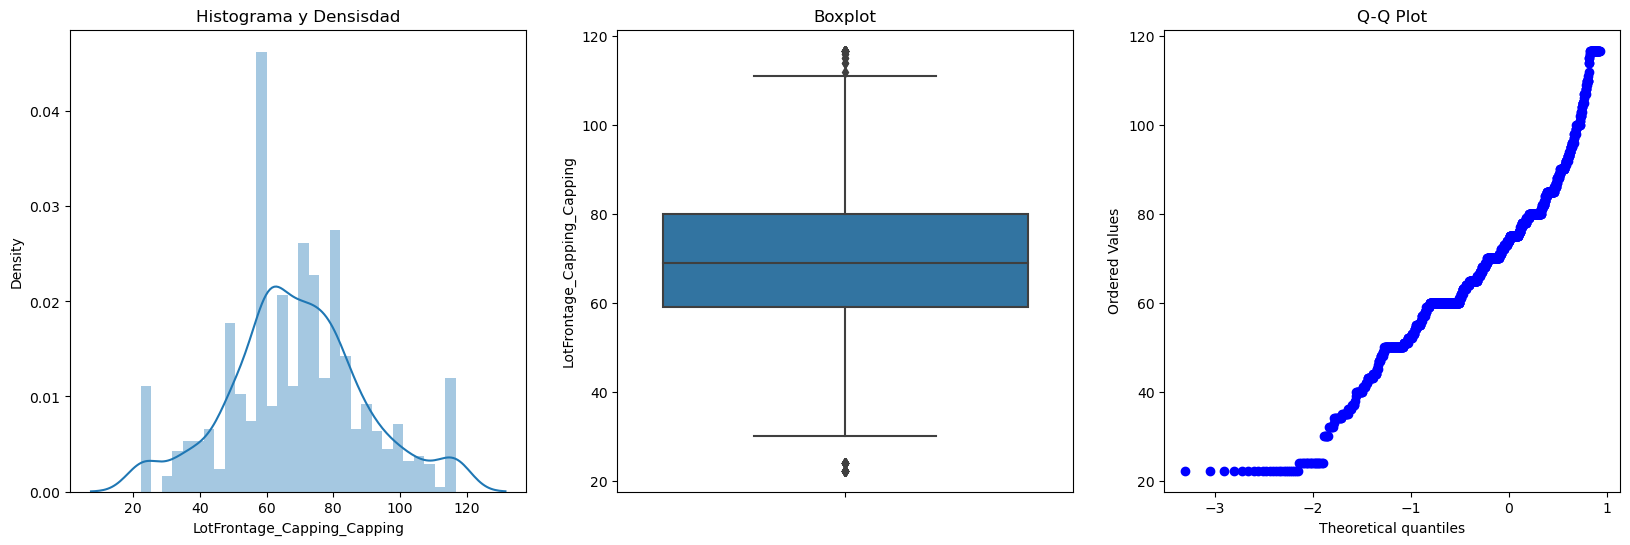

In [145]:
for colname in dataHP.columns:
    if colname.endswith("_Capping"):
        plotDistBoxQQ(dataHP, colname)